# Project One

## THE RELATIONSHIP BETWEEN SAT SCORES AND NYC PUBLIC SCHOOL CHARACTERISTICS IN 2014-2015 SCHOOL YEAR 

### Introduction
The entire project aims to find and analyze the linear relationship between SAT scores (Y) and school characteristics of NYC public schools, particularly the share of minorities and locations (X's). In the end, we will understand what and how  school characteristics influenced students' SAT scores (Y) in NYC public schools in the 2014-2015 school year. The dataset is downloaded from https://www.kaggle.com/nycopendata/high-schools, where the high school data was compiled and published by the New York City Department of Education, and the SAT score averages and testing rates were provided by the College Board.

Particularly in Project One, I will conduct exploratory analysis on average SAT scores and the percentage of White, Black, Hispanic, and Asian students in NYC public schools in the 2014-2015 school year by investigating their distributions and calculating, comparing, and plotting data statistics. Then, I will evaluate the sufficiency of the evidence drawn from the data and comment on what evidence can be used to solve the problem.

#### 1. Load and Clean the Data

In [1]:
import pandas as pd 
import numpy as np 
import qeds
qeds.themes.mpl_style()
import matplotlib.pyplot as plt
import matplotlib.colors as mplc
import matplotlib.patches as patches
%matplotlib inline 

In [2]:
#load the data
df = pd.DataFrame(pd.read_csv("C:/Users/Owner/Desktop/ECO225/wk3/GitExercise/project 1/scores.csv"))
#take a look at what variables are included in the DataFrame
df.columns
#I want to investigate the average total scores, so we create a new column and add three scores together
df['Average SAT Score'] = df['Average Score (SAT Math)'] + df['Average Score (SAT Reading)'] + \
df['Average Score (SAT Writing)']
# remove all rows with NaNs, rest the index, and drop the unwanted columns
satdf = df.drop(['School ID', 'Building Code', 'Street Address', 'State', 'Phone Number', 'Average Score (SAT Math)',\
                'Average Score (SAT Reading)', 'Average Score (SAT Writing)'], axis = 1)
satdf = satdf.dropna().reset_index().drop(["index"], axis = 1)
#convert entries with "%" to float type data
satdf.columns
for i in range(9, 14):
    satdf[satdf.columns[i]] = satdf[satdf.columns[i]].str.replace("%", "")
    satdf[satdf.columns[i]] = pd.to_numeric(satdf[satdf.columns[i]])
satdf.head(2)
#satdf.info(), uncomment to check the type of data

,School Name,Borough,City,Zip Code,Latitude,Longitude,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested,Average SAT Score
0,"New Explorations into Science, Technology and ...",Manhattan,Manhattan,10002,40.71873,-73.97943,8:15 AM,4:00 PM,1735.0,28.6,13.3,18.0,38.5,91.0,1859.0
1,Essex Street Academy,Manhattan,Manhattan,10002,40.71687,-73.98953,8:00 AM,2:45 PM,358.0,11.7,38.5,41.3,5.9,78.9,1193.0


#### 2. Summary Statistics of Independent and Dependent Variables
The independent variables(Y) is`Average SAT Score` and the dependent variables (X's) are `Percent White`, `Percent Black`, `Percent Hispanic`, and `Percent Asian`.

In [3]:
d0 = satdf[['Percent White', 'Percent Black', 'Percent Hispanic', 'Percent Asian']]
satdf2 = pd.concat([satdf['Average SAT Score'], d0], axis = 1)
d1 = pd.concat([satdf2.describe(), satdf2.mode()], axis = 0)
d1.rename(index = {0: 'mode'})
d1.round(decimals = 2)

,Average SAT Score,Percent White,Percent Black,Percent Hispanic,Percent Asian
count,374.00,374.00,374.00,374.00,374.00
mean,1275.35,8.52,35.39,43.93,10.41
std,194.87,13.36,25.37,24.50,14.40
min,924.00,0.00,0.00,2.60,0.00
25%,1157.00,1.30,16.40,20.82,1.60
50%,1226.00,2.60,28.75,45.30,4.20
75%,1327.00,9.38,50.10,63.38,11.15
max,2144.00,79.90,91.20,100.00,88.90
0,1161.00,1.20,0.00,56.90,0.00


From the summary table above, the mean of the ``Average SAT Score`` is greater than its median, this implies that
the distribution of the ``Average SAT Score`` is right-skewed. By applying the comparison to the dependent variables,
notice that except for `Percent Hispanic` whose distribution is left-skewed, those of `Percent White`,
`Percent Black` and `Percent Asian` are all right-skewed. The minimum `Average SAT Score` of public
schools is 924 whereas the highest scores in 2144. The range is 1220, which is very large. This shows that there
is a large gap between the effectiveness of education and the quality of teaching of best schools and worst
schools. The interquartile range of `Average SAT Score` is 170 and its standard deviation is around 195,
showing that the distribution of `Average SAT Score` has a long tail on the right since the third quartile is within
mean±2σ, but the maximum is outside the interval of mean±4σ.

I noticed that the percentage of White, Black, and Asian students in some NYC public schools is 0% and it
happens more often for Black and Asian students since the modes for `Percent Black` and `Percent Asian`
are also 0. In contrast, the percentage of Hispanic students reached 100% in some schools. By looking at the
mean and median (50%) of the dependent variables, I found that the values for `Percent White` and Percent
Asian are similar but much smaller than that of `Percent Black` and `Percent Hispanic`. This means that,
overall, NYC public schools have more Hispanic and Black students than White and Asian. Also, the standard
deviations for `Percent White` and `Percent Asian` are similar and smaller than those of `Percent Black`
and `Percent Hispanic`. This means that distributions of former ones are less spreaded or dispersed than those
of latter ones. Meanwhile, the ranges and IQRs of `Percent Black` and `Percent Hispanic` are greater than
those of `Percent White` and `Percent Asian`.

Besides, the size of the dataset is 374, which is small. So there may not be sufficient evidence for us to solve the
question accurately.

#### 3. Plot Independent Variable
The independent variable (Y) is the `Average SAT Score`. I plot a histogram to see the distribution of average SAT
scores of NYC Public Schools in 2014-2015 school year.

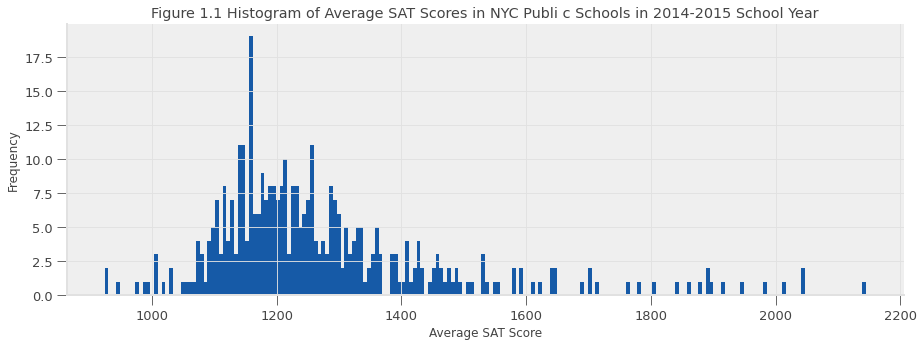

In [4]:
#get the number of rows/schools in the dataframe, used to determine number of bins
len(satdf)
d2 = satdf['Average SAT Score']
plt.rcParams["figure.figsize"] = (15, 5)
d2.plot.hist(bins = 200, title = 'Figure 1.1 Histogram of Average SAT Scores in NYC Publi c Schools in 2014-2015 School Year', \
             fontsize = 13) 
plt.xlabel('Average SAT Score') 
plt.show()

The distribution of the `Average SAT Score` is right-skewed, with the mode at 1161 (based on the graph and the summary statistics in section 2). The shape is reasonable since few students get very low or very high scores in
the test, and most students get scores somewhere in the middle. This finding from the histogram corresponds to
those in section 2 from the summary table.

#### 4. Plot Dependent Variables
The dependent variables(X) are `Percent White`, `Percent Black`, `Percent Hispanic`, `Percent Asian`.

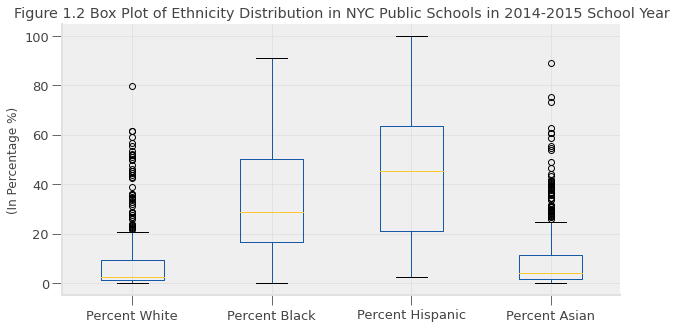

In [5]:
plt.rcParams["figure.figsize"] = (10, 5)
d0.boxplot(fontsize = 13)
plt.title('Figure 1.2 Box Plot of Ethnicity Distribution in NYC Public Schools in 2014-2015 School Year')
plt.ylabel('(In Percentage %)')
plt.show()

From the boxplot, the percentage of Hispanic students is the highest among NYC Public Schools in 2014-2015
School Year, followed by that of Black students, Asian, and White Students.

Notice that the distribution of `Percent White` and `Percent Asian` look similar. The values are mainly below
20% with a lot of outliers that are larger than the main 'body' of the data. So, they are both right-skewed. Their
range, first, second, third quartiles, and thus IQR are about the same value.

The range of `Percent Black` and `Percent Hispanic` are similar, but their distributions are different.
`Percent Black` 's distribution is slightly right-skewed whereas `Percent Hispanic` 's is left-skewed. There is
no outlier in their data. Overall, the percentage of Hispanic students is around 5% higher than the percentage of
Black students.

These findings correspond to what we got in section 2 from the summary table.

#### 5. Plot The Correlation
In this section, I will calculate and plot the correlation between average SAT scores (Y) and the percentage of White, Black, Hispanic, and Asian students (X's).

In [6]:
#the method calculates the correlation between all columns in the data frame
#for simplicity, we only take a look at the first column of the resulted data frame
satdf2.corr()['Average SAT Score'][1:len(satdf2)]

Percent White       0.622380
Percent Black      -0.302675
Percent Hispanic   -0.410191
Percent Asian       0.608893
Name: Average SAT Score, dtype: float64

The results above are the correlation between average SAT scores and the percentage of White, Black, Hispanic, and Asian students respectively. To get a better understanding, I made scatterplots for average SAT scores against each `Percent`.

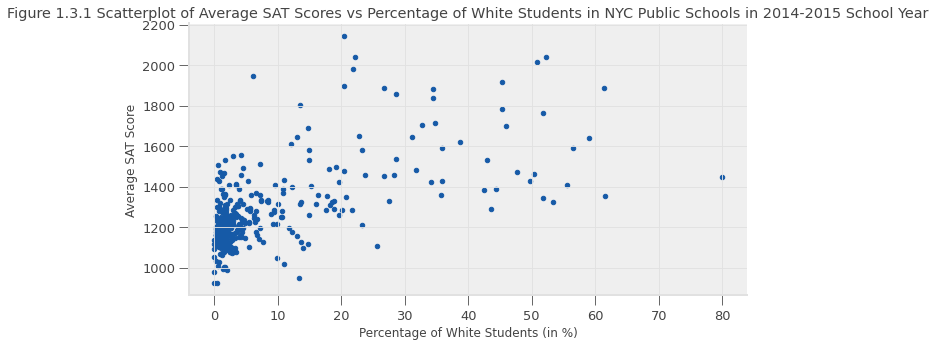

In [7]:
plt.rcParams["figure.figsize"] = (10, 5)
satdf2.plot.scatter(x = 'Percent White', y = 'Average SAT Score', fontsize = 13)
plt.title('Figure 1.3.1 Scatterplot of Average SAT Scores vs Percentage of White Students in NYC Public Schools \
in 2014-2015 School Year')
plt.xlabel('Percentage of White Students (in %)')
plt.show()

The correlation between `Average SAT Score` and `Percent White` is 0.622380, indicating a moderate
positive relationship between the average SAT score and the percentage of White students in NYC Public
Schools in 2014-2015 School Year. From the scatterplot, it can be seen that overall, the average SAT score
increases with the increasing percentage of White students. This pattern is not clear since most of the data cluster
at the left bottom corner. Doing a log transformation may solve the problem, but the interpretation of the
transformed variable is less meaningful.

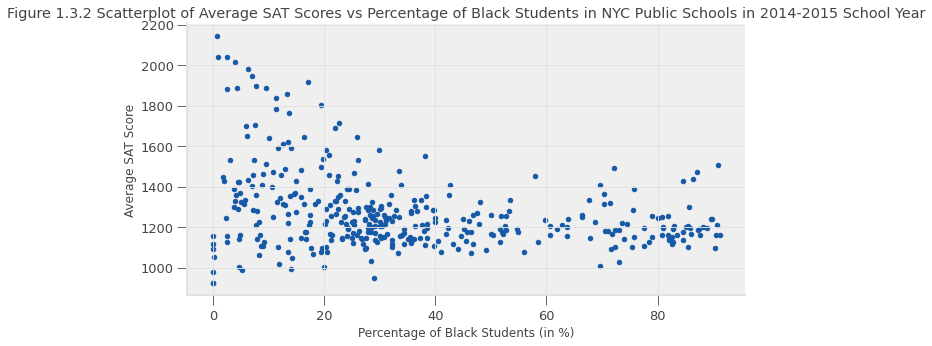

In [8]:
plt.rcParams["figure.figsize"] = (10, 5)
satdf2.plot.scatter(x = 'Percent Black', y = 'Average SAT Score', fontsize = 13)
plt.title('Figure 1.3.2 Scatterplot of Average SAT Scores vs Percentage of Black Students in NYC Public Schools \
in 2014-2015 School Year')
plt.xlabel('Percentage of Black Students (in %)')
plt.show()

The correlation between `Average SAT Score` and `Percent Black` is -0.302675, indicating a weak negative
relationship between the average SAT score and the percentage of Black students in NYC Public Schools in
2014-2015 School Year. From the scatterplot, it can be seen that when `Percent Black` is less than 40%, the
average SAT score decreases in general with an increasing percentage of Black students whereas the `Average SAT Score` remained steady as `Percent Black` increase from 40% to above 80%.

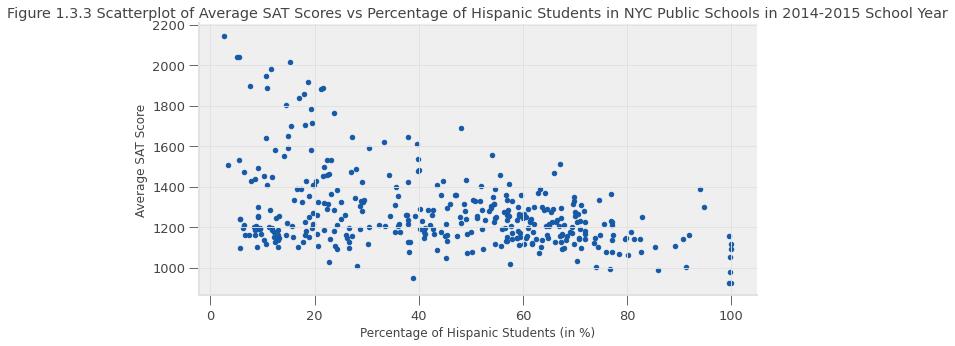

In [9]:
plt.rcParams["figure.figsize"] = (10, 5)
satdf2.plot.scatter(x = 'Percent Hispanic', y = 'Average SAT Score', fontsize = 13)
plt.title('Figure 1.3.3 Scatterplot of Average SAT Scores vs Percentage of Hispanic Students in NYC Public Schools \
in 2014-2015 School Year')
plt.xlabel('Percentage of Hispanic Students (in %)')
plt.show()

This scatterplot is similar to the one with `Percent Black`. The correlation between `Average SAT Score` and
`Percent Hispanic` is -0.410191, indicating a weak negative relationship between the average SAT score and
the percentage of Hispanic students in NYC Public Schools in 2014-2015 School Year. From the scatterplot, it
can be seen that when `Percent Hispanic` is less than 40%, the average SAT score decreases in general with
an increasing percentage of Hispanic students whereas the pattern gets unclear as `Percent Black` increase
from 40% to 100%.

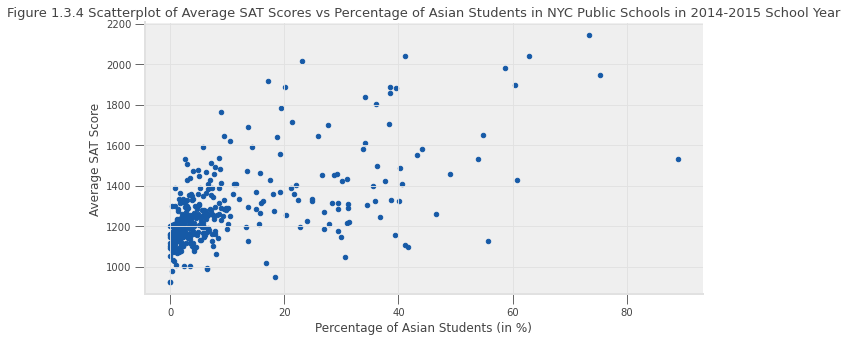

In [10]:
plt.rcParams["figure.figsize"] = (10, 5)
satdf2.plot.scatter(x = 'Percent Asian', y = 'Average SAT Score')
plt.title('Figure 1.3.4 Scatterplot of Average SAT Scores vs Percentage of Asian Students in NYC Public Schools \
in 2014-2015 School Year', fontsize = 13)
plt.xlabel('Percentage of Asian Students (in %)')
plt.show()

This scatterplot is similar to the one with `Percent White`. The correlation between `Average SAT Score` and `Percent Asian` is 0.608893, indicating a moderate positive relationship between the average SAT score and
the percentage of Asian students in NYC Public Schools in the 2014-2015 School Year. From the scatterplot, it can
be seen that overall, the average SAT score increases with an increasing percentage of Asian students.

#### 6. Deeper Investigation using GroupBy
In this section, I will use Groupby to explore more about the covariates and their correlations with the outcome.

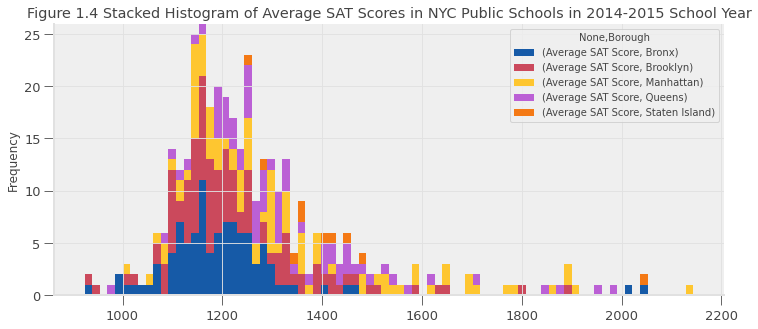

In [11]:
#investigate the number of groups by each variable
df["City"].unique() 
df["Borough"].unique()
satdf3 = pd.concat([satdf[["Borough", "City"]], satdf2], axis = 1)
satdf3.columns
sat_B = satdf3[["Average SAT Score", "Borough"]]
plt.rcParams["figure.figsize"] = (12, 5)
sat_B.pivot(columns = "Borough").plot(kind = 'hist', stacked = True, bins = 80, fontsize = 13)
plt.title("Figure 1.4 Stacked Histogram of Average SAT Scores in NYC Public Schools in 2014-2015 School Year")
plt.show()

From the stacked histogram above, it can be seen that the distributions of Average SAT Scores in NYC Public Schools in 2014-2015 School Year are similar across boroughs.


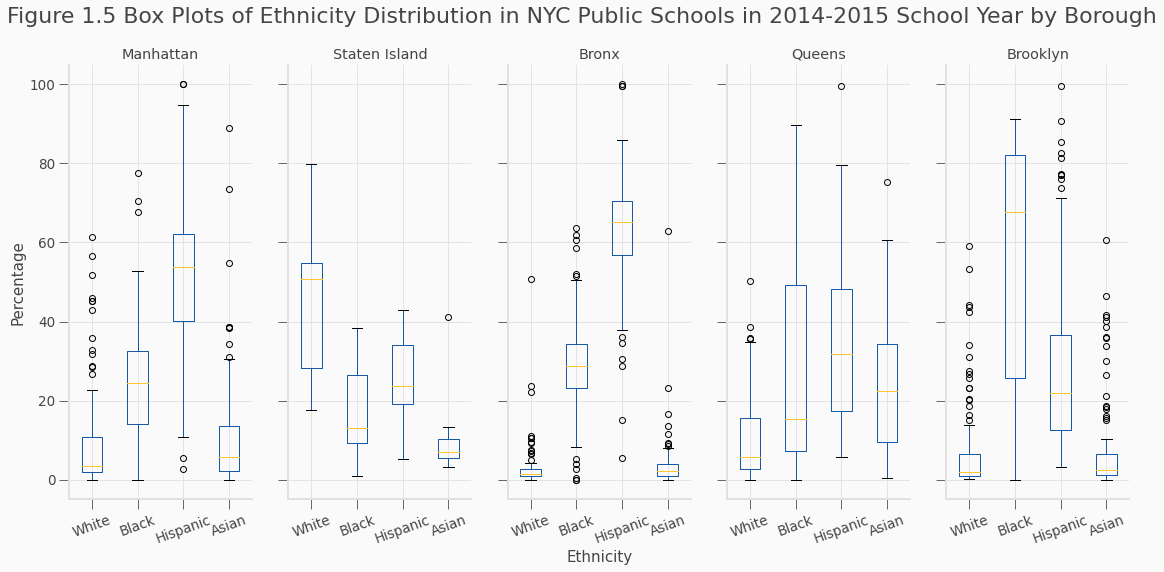

In [12]:
satdf4 = satdf3.rename(columns = {"Percent White": "White", "Percent Black": "Black", "Percent Hispanic": "Hispanic",\
                       "Percent Asian": "Asian"})

def single_box_plot(df, b, ax):
    """
    This function creates a single boxplot for distribution of ethnic groups across Boroughs
    """
    # Filter data to keep only the data of interest
    _df = satdf4.drop("Average SAT Score", axis = 1).loc[satdf4['Borough'] == b]
    _df.plot(kind = "box", ax = ax, fontsize = 13.5, rot = 20)
    return ax

fig, ax = plt.subplots(1, 5, figsize = (19, 8), sharey = True)

for (i, b) in enumerate(satdf4.Borough.unique()):
    single_box_plot(satdf4, b, ax[i])
    ax[i].set_title(str(b))

bgcolor = (250/255, 250/255, 250/255)
fig.set_facecolor(bgcolor)
fig.suptitle("Figure 1.5 Box Plots of Ethnicity Distribution in NYC Public Schools in 2014-2015 School Year by Borough", \
             fontsize = 22)
ax[0].set_ylabel("Percentage", fontsize = 15)
ax[2].set_xlabel("Ethnicity", fontsize = 15)

for (i, _ax) in enumerate(ax):
    _ax.spines['right'].set_visible(False)
    _ax.spines['top'].set_visible(False)
    
    _ax.set_facecolor(bgcolor) 

The above are box plots of Ethnicity Distribution in NYC Public Schools in 2014-2015 School Year across
boroughs. Notice that the distribution varies significantly between boroughs.

The distribution of ethnicity in Bronx and Manhattan are similar: `Percent White` , `Percent Asian` , and
`Percent Black` is right-skewed, `Percent Hispanic` is slightly left-skewed. The percentage of White and
Asian students are the least and have similar values, followed by the percentage of Black and Hispanic. These 2
boroughs have similar patterns of ethnicity distribution as the entire NYC in section 3.

For Brooklyn, the distribution of `Percent White` and `Percent Asian` are similar: right-skewed, similar
quartiles and range. But here, `Percent Hispanic` is also right-skewed, with smaller values than Percent
Black in general. Here, `Percent Black` is slightly left-skewed and with the largest range and quartile values
among all ethnicity groups.

Then, in Queens, the four variables' distributions all have a right skewness. Overall, `Percent White` has the
smallest value. followed by `Percent Asian` , `Percent Black` , and `Percent Hispanic` .

In Staten Island, it is obvious that `Percent White` has the highest value among all ethnicity groups, with slight
left skewness. This situation only exists in the borough Staten Island. The distributions of the variables of the other 3
ethnicity groups are right-skewed with `Percent Hispanic` having larger values, followed by `Percent Black`
and `Percent Asian` .

Since the pattern in Staten Island is so distinct from others, I take a look at the average scores and evaluate the
findings based on the number of schools investigated in each borough.

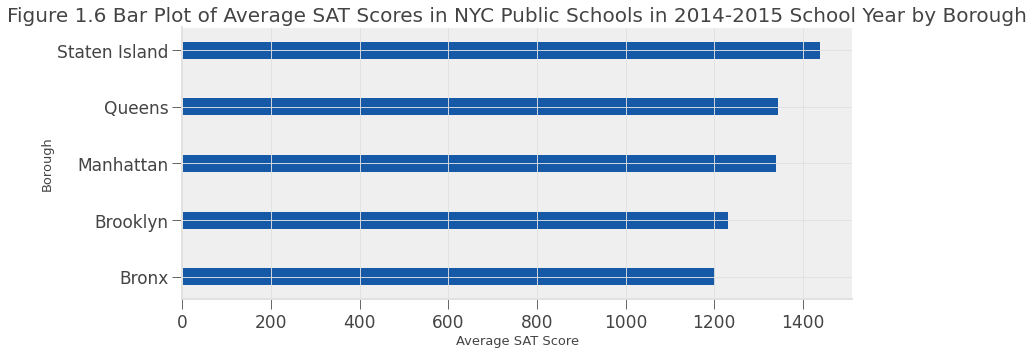

In [13]:
plt.rcParams["figure.figsize"] = (12, 5)
fig, ax = plt.subplots()
gbb = satdf4[["Borough", "Average SAT Score"]].groupby("Borough").mean().sort_values('Average SAT Score', ascending = True)
gbb.plot(kind = "barh", ax = ax, legend = False, fontsize = 17, width = 0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Figure 1.6 Bar Plot of Average SAT Scores in NYC Public Schools in 2014-2015 School Year by Borough",\
             fontsize = 20)
ax.set_xlabel("Average SAT Score", fontsize = 13)
ax.set_ylabel("Borough", fontsize = 13)
plt.show()

In [14]:
sat_B.groupby("Borough").count().rename(columns = {'Average SAT Score':'Number of Schools'})
# satdf3.groupby("Borough")['City'].value_counts().to_frame(name = "Number of Schools")

,Number of Schools
Borough,
Bronx,98
Brooklyn,109
Manhattan,89
Queens,68
Staten Island,10


See from the bar plot that schools in Staten Island have the highest Average SAT scores compared to other
boroughs. But since the number of schools in Staten Island investigated in the dataset is 10, which is too small,
there is insufficient evidence to conclude that a greater percentage of White students will have a positive impact on
the SAT scores.

Besides, among the other 4 boroughs, schools in Manhattan have the highest Average SAT scores, but from the
boxplot, `Percent Hispanic` is the highest among all ethnic groups. We cannot conclude a higher proportion of
Hispanic students at school also lead to a higher average SAT scores because, in Bronx, `Percent Hispanic` is
also the highest, but its average score is the lowest among all boroughs in NYC from the barplot.

### Conclusion
The distribution of average SAT scores are similar across the boroughs in NYC such that the overall distribution
also has similar patterns as them: right-skewed. But the distribution of ethnicity varies from boroughs to
boroughs, and the overall pattern is largely influenced by the places that have a larger amount of data in the
dataset.

So far, by looking at the pattern generally and individually, there isn't sufficient evidence to find a relationship
between average SAT scores and ethnicity distribution. To better understand the relationship, we need to either
increase the size of the dataset by adding more statistics or include more covariates into consideration and run a
linear regression of X on Y.

# Project Two

## Introduction
In Project Two, I will conduct deeper exploratory analysis on the data to investigate the association between enthnicity distribution(X), locations, and average SAT scores (Y). I will use the Zipcode (ZCTA) shapefile https://www2.census.gov/geo/tiger/TIGER2019/ZCTA5/tl_2019_us_zcta510.zip and the counties shapefile https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip for the maps.

Also, I will evaluate the sufficiency of the evidence drawn from the data and comment on what the evidence can be used to solve the problem.

### THE MESSAGE 
I want to investigate whether the average SAT score and the average ethnic proportion groups in schools differ across Boroughs/Cities and by how much. I will only keep the plots that convey information clearly.

### Plots for THE MESSAGE

In [15]:
# A bar plot comparing average SAT scores across Boroughs and Cities.
satdf5 = satdf4[["Borough", "City", "Average SAT Score"]].groupby(["Borough", "City"]).mean()
gbc = satdf5.sort_values('Average SAT Score', ascending = True).reset_index()
gbm_b = satdf4[["Borough", "White", "Black", "Hispanic", "Asian"]].groupby("Borough").mean()
gbm_c = satdf4[["City", "White", "Black", "Hispanic", "Asian"]].groupby("City").mean()

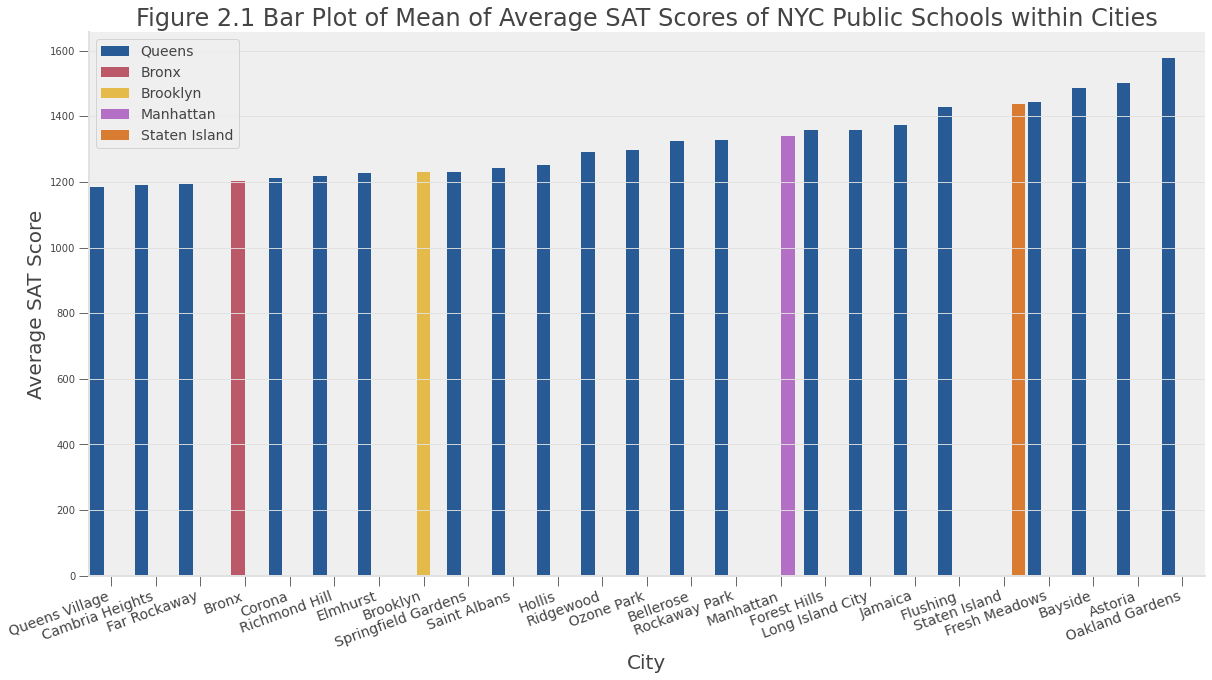

In [16]:
import seaborn as sns
fig,ax = plt.subplots()
fig.set_size_inches(20, 10)
p = sns.barplot(x = 'City', y ='Average SAT Score', data = gbc, hue = 'Borough', ax = ax)

#fine-tune
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * 0.5)

change_width(ax, 0.3)

plt.legend(prop = {'size': 14})
p.set_xticklabels(p.get_xticklabels(), rotation = 20, horizontalalignment = 'right', fontsize = 14)
ax.set_xlabel("City", fontsize = 20)
ax.set_ylabel("Average SAT Score", fontsize = 20)
ax.set_title('Figure 2.1 Bar Plot of Mean of Average SAT Scores of NYC Public Schools within Cities', fontsize = 24)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

As seen from the plot above, the distribution of average SAT scores of schools in cities of Queens Borough is fairly
even (i.e. the number of schools within a certain range of SAT scores is similar). But within the Borough, variations
of average SAT scores of schools is large across cities as the lowest is below 1200 while the highest is around 1600. 

For the other 4 boroughs, not much information can be drawn from the plot since they only have one city
included in the dataset. We can only see that the average SAT scores of schools in Staten Island Borough is the
highest among the four, followed by Manhattan, Brooklyn, and Bronx.

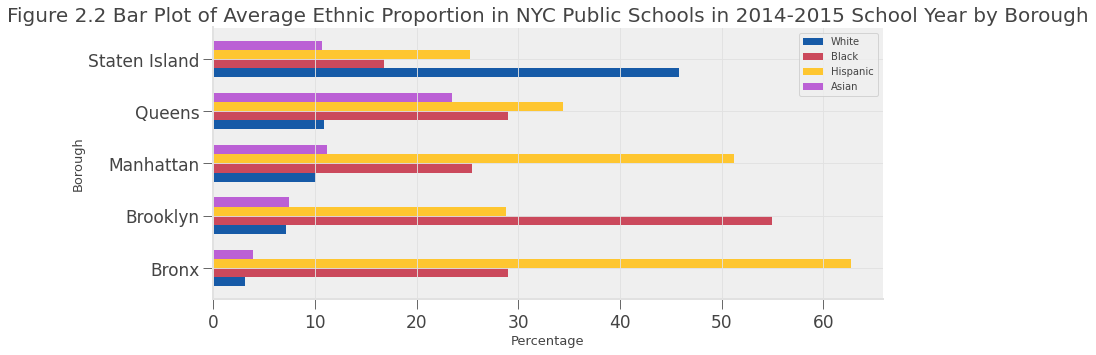

In [17]:
plt.rcParams["figure.figsize"] = (12, 5)
fig, ax = plt.subplots()
gbm_b.plot(kind = "barh", ax = ax, legend = True, fontsize = 17, width = 0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Figure 2.2 Bar Plot of Average Ethnic Proportion in NYC Public Schools in 2014-2015 School Year by \
Borough", fontsize = 20)
ax.set_xlabel("Percentage", fontsize = 13)
ax.set_ylabel("Borough", fontsize = 13)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

From the bar plot above, it can be seen that within Borough Queens, Manhattan, Brooklyn, and Bronx, the
average percentage of Hispanic and Black students are the highest, followed by that of Asian and White. So we
can expect the average SAT scores of schools in these Boroughs are close if assume all other characteristics of
schools are the same.

The pattern changes in Borough Staten Island. The average percentage of White is the highest. We could expect
the difference in average SAT scores of schools in Staten Island and other 4 Boroughs, keeping all other
characteristics of schools the same.

In [18]:
#This plot is MESSY!

# plt.rcParams["figure.figsize"] = (12, 20)
# fig, ax = plt.subplots()
# gbm_c.plot(kind = "barh", ax = ax, legend = True, fontsize = 17, width = 0.7)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.set_title("Bar Plot of Average Ethnic Proportion in NYC Public Schools in 2014-2015 School Year by City", fontsize = 20)
# ax.set_xlabel("Percentage", fontsize = 13)
# ax.set_ylabel("City", fontsize = 13)
# plt.show()

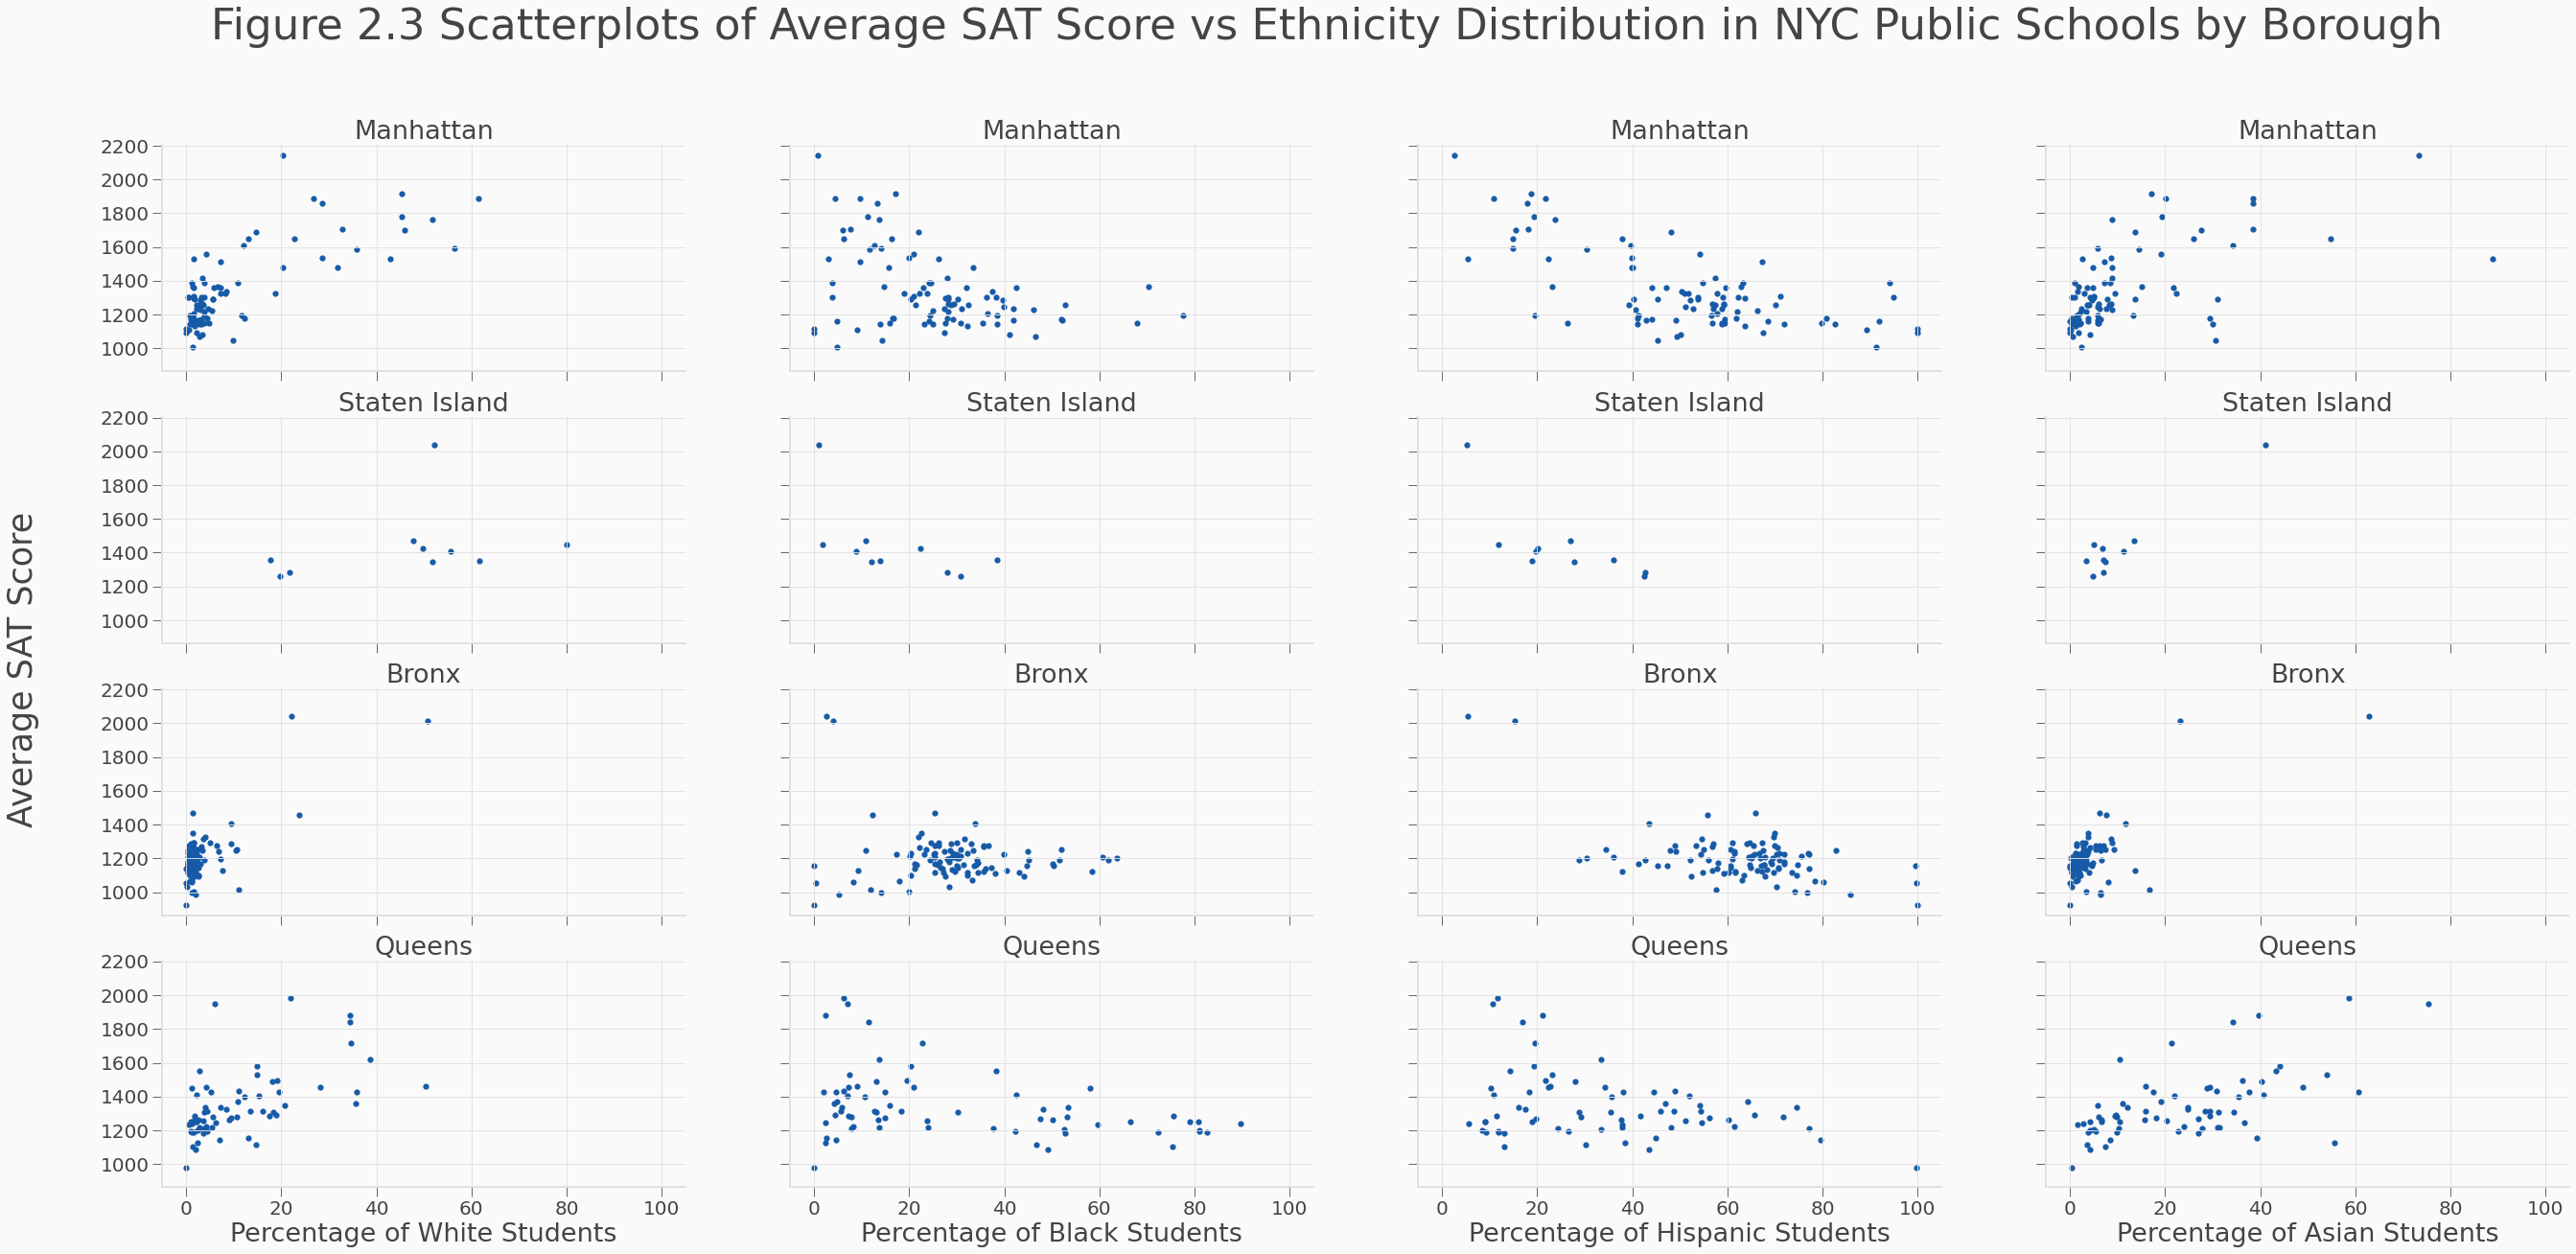

In [19]:
# scatterplots for scores by borough vs percentage of ethnicity (4 boroughs here)

def single_scatter_plot1(df, b, r, ax):
    """
    This function creates a single scatterplot of average SAT score against the distribution of ethnic groups 
    """
    # Filter data to keep only the data of interest
    _df = df.query("Borough == @b")[["Average SAT Score", r]]
    _df.plot(kind = "scatter", x = r, y = "Average SAT Score", ax = ax, fontsize = 20, s = 27)

    return ax


fig, ax = plt.subplots(4, 4, figsize = (45, 20), sharey = True, sharex = True)
bgcolor = (250/255, 250/255, 250/255)

for i in range(4):
    for j in range(4):
        single_scatter_plot1(satdf4, satdf4.Borough.unique()[i], list(satdf4)[3:][j], ax[i, j]) 
        ax[i, j].set_ylabel("")
        ax[i, j].spines['right'].set_visible(False)
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].set_facecolor(bgcolor) 
        ax[i, j].set_title(str(satdf4.Borough.unique()[i]), fontsize = 27)
        if i == 3:
            ax[i, j].set_xlabel(("Percentage of " + str(list(satdf4)[3:][j]) + " Students"), fontsize = 27)
fig.text(0.075, 0.5, 'Average SAT Score', va = 'center', rotation = 'vertical', fontsize = 35)        
fig.set_facecolor(bgcolor)
fig.suptitle("Figure 2.3 Scatterplots of Average SAT Score vs Ethnicity Distribution in NYC Public Schools by Borough",\
             fontsize = 45)
plt.show()

The plots above are the scatterplots of the average SAT score of school in each borough against the ethnic shares in
NYC Public Schools. Scatterplots enable us to have a more direct and clear look at the correlation between
percentage of students with certain ethnicity and the school's average SAT score.

First, notice that there are few points in the scatterplot for Staten Island borough, implying there is a small number of
samples for this borough in our data set. We see a positive correlation between average SAT score and `Percent Asian` and a moderate negative correlation between average SAT score and `Percent Hispanic`. But due to
the small size of data, we cannot draw the conclusion for the correlation with 100% confidence.

Second, for the remaining 3 boroughs, there are weak positive correlations between average SAT score and
`Percent White` as well as `Percent Asian`. Meanwhile, there are weak negative correlations between
average SAT score and `Percent Black` as well as`Percent Hispanic`.

Since the pattern is not strong enough to indicate a correlation between the ethnic shares and average SAT score,
we need deeper investigations to find out any other confounders that impact the relationship between two
variables.

### Map for THE MESSAGE
We want to investigate whether the location is a confounder that impacts the relationship between ethnic shares and
average SAT scores. For all maps in this section, the grey part is the location where none of the schools is
included in the dataset.

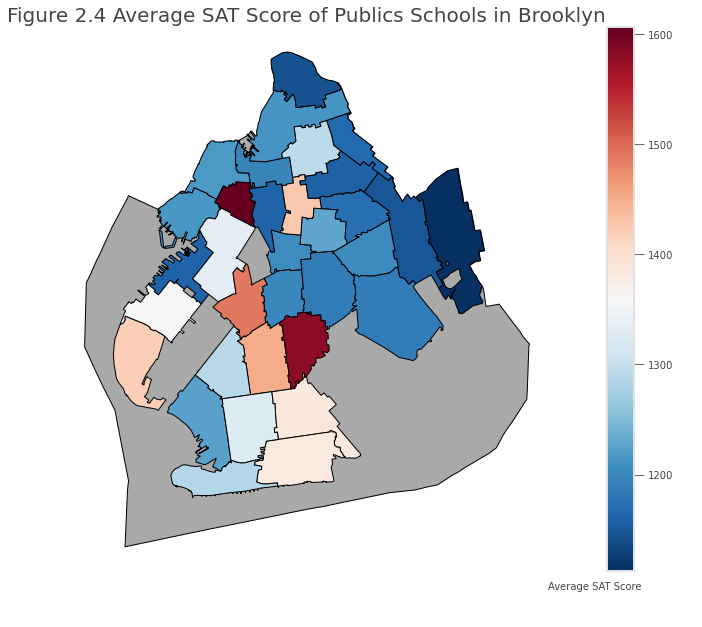

In [20]:
# Average SAT grades for each zip code in Kings County
import geopandas as gpd
from shapely.geometry import Point
#1. calculate average SAT scores for each zip code in Kings County 
zip_df = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/ZCTA5/tl_2019_us_zcta510.zip") 
zip_df.dtypes
satdf6 = satdf.query("Borough == 'Brooklyn'")[["Zip Code", "Average SAT Score"]].groupby("Zip Code").mean().reset_index()
satdf6 = satdf6.astype({'Zip Code': 'str'})
satdf6.dtypes

#2. merge with the zipfile, keep the df with less info, check for column info before merging
mdf = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], satdf6, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")
mdf.head()
type(mdf)

#3. plot the info on map
# 1) Plot the map of King County
county = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/COUNTY/tl_2019_us_county.zip") 
county_df = county.query("(STATEFP == '36') & (NAME == 'Kings')") 
county_df.head()
fig, gax = plt.subplots(figsize = (20, 10)) 

county_df.plot(ax = gax, edgecolor = "black", color = "darkgrey") 
# 2) Add relevant info
mdf.plot(ax = gax, edgecolor = 'black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r')
# 3) Annotate & Add labels
gax.annotate('Average SAT Score', xy = (0.78, 0.06),  xycoords = 'figure fraction')
gax.set_title('Figure 2.4 Average SAT Score of Publics Schools in Brooklyn', fontsize = 20)

# 3) Fine-tune
plt.axis('off')
plt.show()

It is obvious that, overall, the average SAT scores of northern regions in Kings County are lower than that in the south and the middle of the county. But 2 areas with zip codes 11216 and 11217 in the north are exceptions: their zip code-level score is much higher than the other places near them. And since around 2/3 part of the county is missing in the dataset, we do not have sufficient evidence to conclude that the southern and middle part of King county have higher SAT scores on average than the northern part.

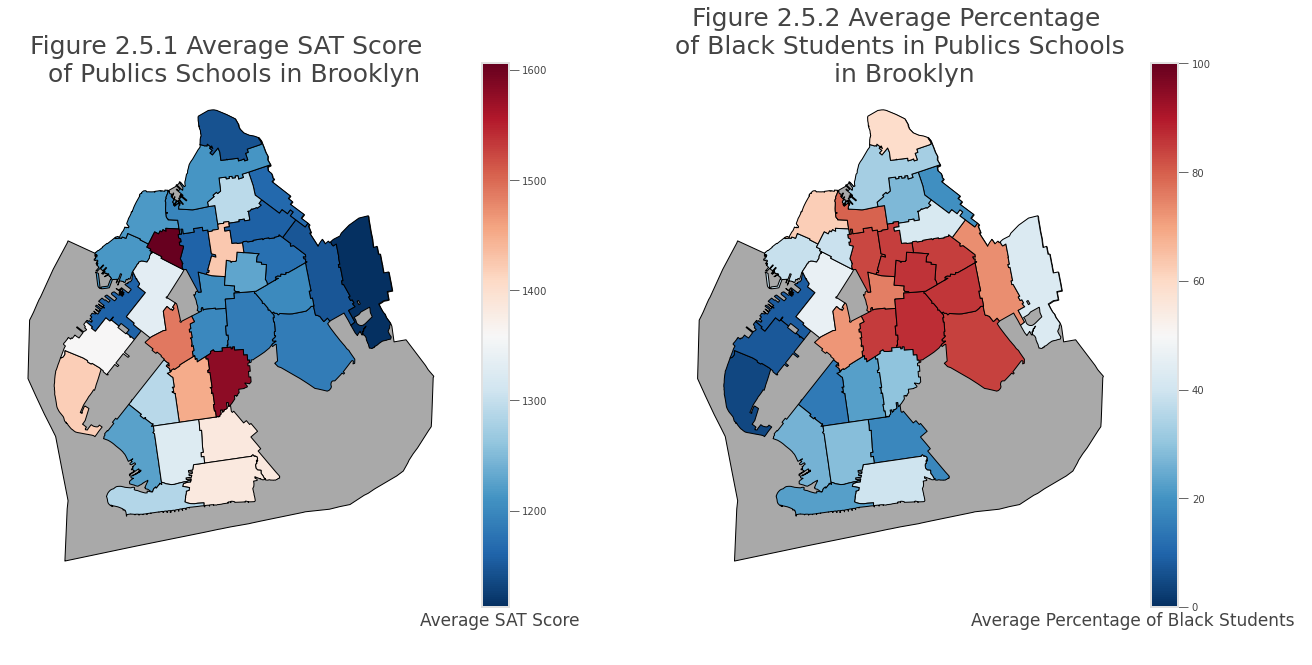

In [21]:
# Plot Average Percentage of Black students for each zip code in Kings County with Average SAT score side-by-side

satdf7 = satdf.query("Borough == 'Brooklyn'")[["Zip Code", "Percent Black"]].groupby("Zip Code").mean().reset_index()
satdf7 = satdf7.astype({'Zip Code': 'str'})
mdf2 = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], satdf7, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")

fig, gax = plt.subplots(figsize = (22, 10), ncols = 2) 

county_df.plot(ax = gax[0], edgecolor = "black", color = "darkgrey") 
mdf.plot(ax = gax[0], edgecolor = 'black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r')
gax[0].annotate('Average SAT Score', xy = (0.32, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[0].set_title('Figure 2.5.1 Average SAT Score \n of Publics Schools in Brooklyn', fontsize = 25)
gax[0].axis('off')

county_df.plot(ax = gax[1], edgecolor = "black", color = "darkgrey") 
mdf2.plot(ax = gax[1], edgecolor='black', column = 'Percent Black', legend = True, cmap = 'RdBu_r', vmin = 0, vmax = 100)
gax[1].annotate('Average Percentage of Black Students', xy = (0.74, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[1].set_title('Figure 2.5.2 Average Percentage \n of Black Students in Publics Schools \n in Brooklyn', fontsize = 25)
gax[1].axis('off')

plt.show()

The plot above relates the average SAT score and the average percentage of Black students at schools in the Kings County. 

From the plot, public schools in the middle of the county have a higher proportion of Black students, which is around 80%. See that the corresponding regions have relatively lower average SAT scores. And as the contrast of colors in the remaining regions is significant, the majority of the rest part of the county where the average `Percent Black` is high have lower average SAT score. Thus, there may be large negative correlation between `Percent Black` and `Average SAT Score`.

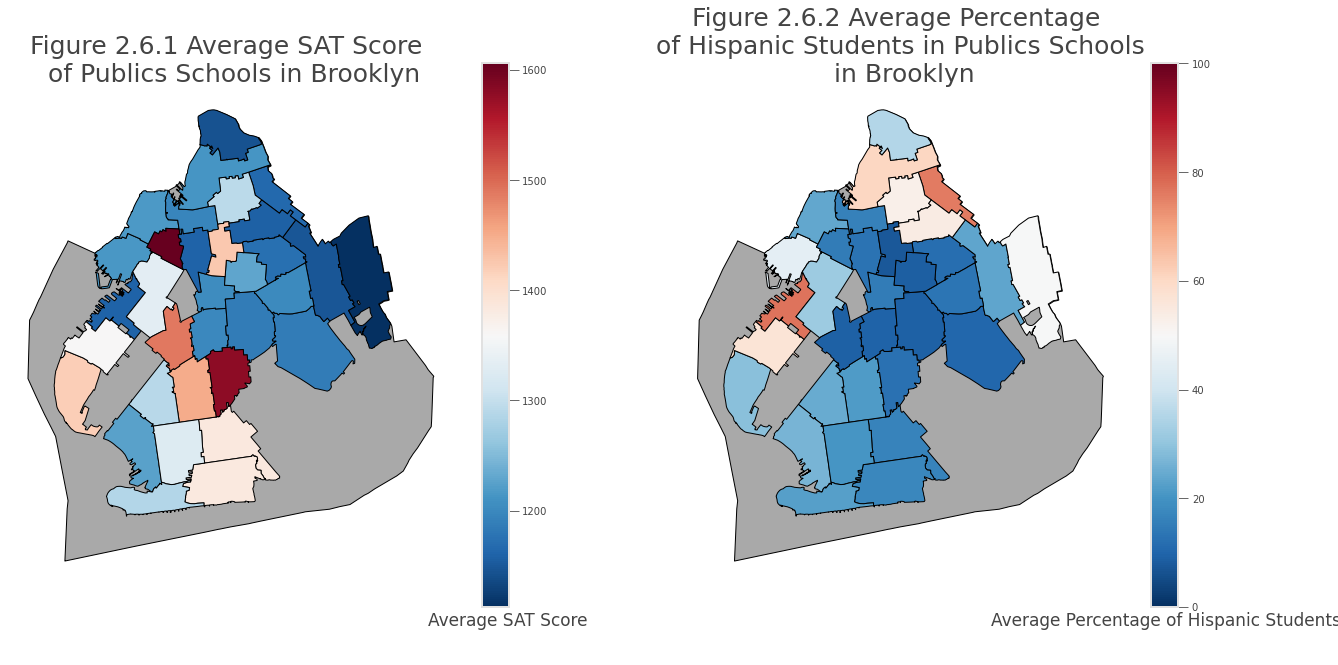

In [22]:
# Plot Average Percentage of Hispanic students for each zip code in Kings County with Average SAT score side-by-side

satdf9 = satdf.query("Borough == 'Brooklyn'")[["Zip Code", "Percent Hispanic"]].groupby("Zip Code").mean().reset_index()
satdf9 = satdf9.astype({'Zip Code': 'str'})
mdf4 = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], satdf9, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")

fig, gax = plt.subplots(figsize = (22, 10), ncols = 2) 

county_df.plot(ax = gax[0], edgecolor = "black", color = "darkgrey") 
mdf.plot(ax = gax[0], edgecolor='black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r')
gax[0].annotate('Average SAT Score', xy = (0.32, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[0].set_title('Figure 2.6.1 Average SAT Score \n of Publics Schools in Brooklyn', fontsize = 25)
gax[0].axis('off')


county_df.plot(ax = gax[1], edgecolor = "black", color = "darkgrey") 
mdf4.plot(ax = gax[1], edgecolor='black', column = 'Percent Hispanic', legend = True, cmap = 'RdBu_r', vmin = 0, vmax = 100)
gax[1].annotate('Average Percentage of Hispanic Students', xy = (0.74, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[1].set_title('Figure 2.6.2 Average Percentage \n of Hispanic Students in Publics Schools \n in Brooklyn', fontsize = 25)
gax[1].axis('off')

plt.show()

The plot above relates the average SAT score and the average percentage of Hispanic students at schools in the Kings County. 

From the plot, some regions where the average percentage of Hispanic students is high have lower average SAT score. But compared with `Percent Black`, the correlation between `Percent Hispanic` and `Average SAT Score` is weaker since the contrast of colors between maps is less significant than the previous one. This implies that there may be a weak negative correlation between `Percent Hispanic` and `Average SAT Score`.

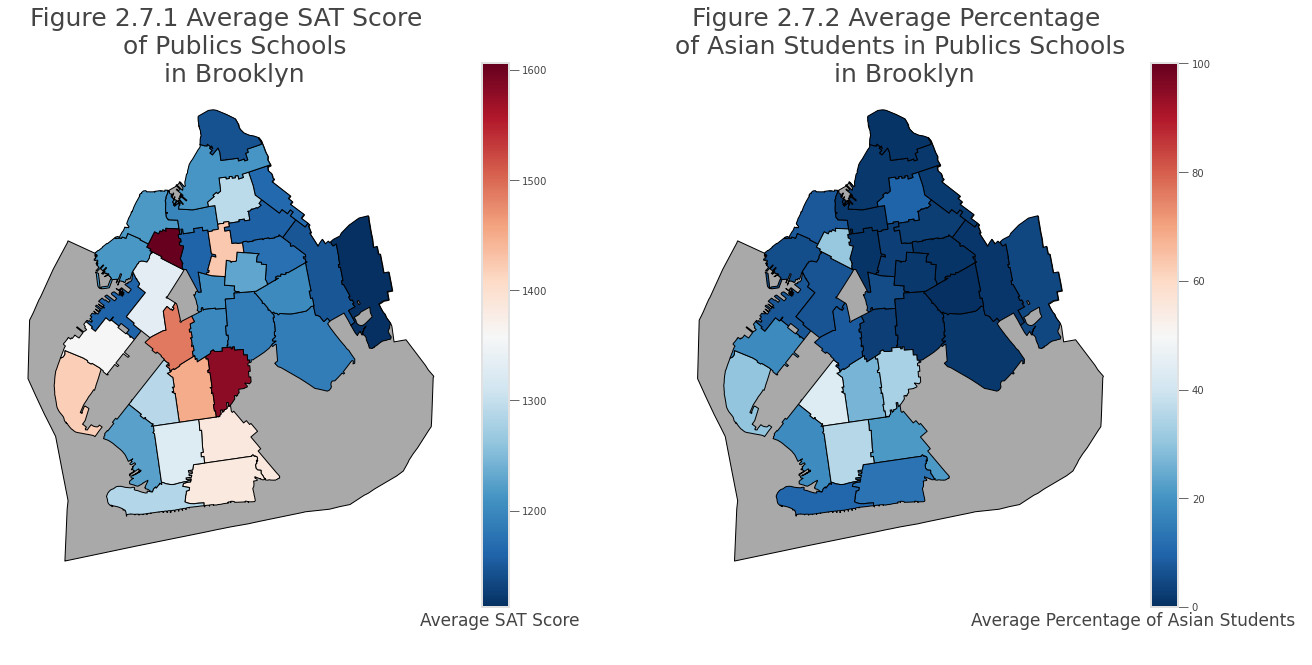

In [23]:
# Plot Average Percentage of Asian students for each zip code in Kings County with Average SAT score side-by-side

satdf10 = satdf.query("Borough == 'Brooklyn'")[["Zip Code", "Percent Asian"]].groupby("Zip Code").mean().reset_index()
satdf10 = satdf10.astype({'Zip Code': 'str'})
mdf5 = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], satdf10, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")

fig, gax = plt.subplots(figsize = (22, 10), ncols = 2) 

county_df.plot(ax = gax[0], edgecolor = "black", color = "darkgrey") 
mdf.plot(ax = gax[0], edgecolor='black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r')
gax[0].annotate('Average SAT Score', xy = (0.32, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[0].set_title('Figure 2.7.1 Average SAT Score \n of Publics Schools\n in Brooklyn', fontsize = 25)
gax[0].axis('off')

county_df.plot(ax = gax[1], edgecolor = "black", color = "darkgrey") 
mdf5.plot(ax = gax[1], edgecolor='black', column = 'Percent Asian', legend = True, cmap = 'RdBu_r', vmin = 0, vmax = 100)
gax[1].annotate('Average Percentage of Asian Students', xy = (0.74, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[1].set_title('Figure 2.7.2 Average Percentage \n of Asian Students in Publics Schools \n in Brooklyn', fontsize = 25)
gax[1].axis('off')

plt.show()

The plot above relates the average SAT score and the average percentage of Asian students at schools in the Kings County. 

From the map on the right, the northeast public schools of the county has an extremely low proportion of Asian students, which is below 10%. And see that the avergae SAT score of the corresponding region is not significantly high, except for area with zip code 11216. For the rest parts, some regions where the average percentage of Asian students is low have higher average SAT score. This implies that there may be a moderate or weak negative correlation between `Percent Asian` and `Average SAT Score`.

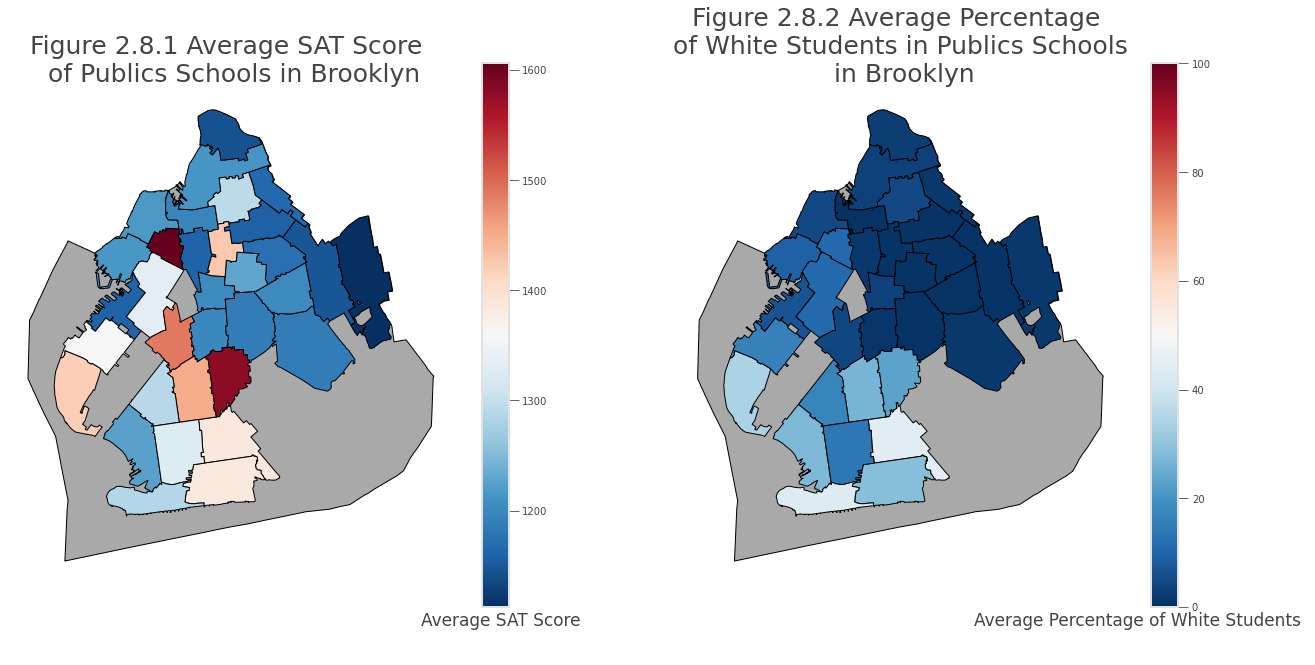

In [24]:
# Plot Average Percentage of White students for each zip code in Kings County with Average SAT score side-by-side

satdf8 = satdf.query("Borough == 'Brooklyn'")[["Zip Code", "Percent White"]].groupby("Zip Code").mean().reset_index()
satdf8 = satdf8.astype({'Zip Code': 'str'})
mdf3 = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], satdf8, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")

fig, gax = plt.subplots(figsize = (22, 10), ncols = 2) 

county_df.plot(ax = gax[0], edgecolor = "black", color = "darkgrey") 
mdf.plot(ax = gax[0], edgecolor='black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r')
gax[0].annotate('Average SAT Score', xy = (0.32, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[0].set_title('Figure 2.8.1 Average SAT Score \n of Publics Schools in Brooklyn', fontsize = 25)
gax[0].axis('off')

county_df.plot(ax = gax[1], edgecolor = "black", color = "darkgrey") 
mdf3.plot(ax = gax[1], edgecolor='black', column = 'Percent White', legend = True, cmap = 'RdBu_r', vmin = 0, vmax = 100)
gax[1].annotate('Average Percentage of White Students', xy = (0.74, 0.06),  xycoords = 'figure fraction', fontsize = 17)
gax[1].set_title('Figure 2.8.2 Average Percentage \n of White Students in Publics Schools \n in Brooklyn', fontsize = 25)
gax[1].axis('off')

plt.show()

The plot above relates the average SAT score and the average percentage of White students at schools in the
Kings County.

The map on the right is almost the same as the one for `Percent Asian` , with few differences. Similarly, the
northeast public schools of the county have an extremely low proportion of White students, which is below 10%.
And see that the average SAT score of the corresponding region is not significantly high, except for the area with zip
code 11216. For the rest parts, some regions where the average percentage of White students is low have
a higher average SAT score. This implies that there may be a moderate or weak negative correlation between
`Percent White` and `Average SAT Score`.

### Maps with Bokeh Library
The HTML to my project is https://drive.google.com/file/d/1pgCVnYsvolYm879uqKgZ0m4XOHkcK-oG/view?usp=sharing (in Google Drive).

In [25]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json

Loading BokehJS ...

In [26]:
# Average SAT grades for each zip code in Kings County
dfzc = satdf.query("Borough == 'Brooklyn'")[["Zip Code", "Average SAT Score"]].groupby("Zip Code").count().rename(
    columns = {"Average SAT Score": "Num"}).reset_index()
dfzc = dfzc.astype({'Zip Code': 'str'})
satdf11 = satdf.query("Borough == 'Brooklyn'")[['Zip Code', 'Percent White', 'Percent Black', 'Percent Hispanic', \
                                                'Percent Asian', "Average SAT Score"]].groupby("Zip Code").mean().reset_index()
satdf11 = satdf11.astype({'Zip Code': 'str'})
# merge with the zipfile, keep the df with less info, check for column info before merging
mdf = pd.merge(zip_df[["ZCTA5CE10", "geometry"]], satdf11, left_on = "ZCTA5CE10", right_on = "Zip Code", how = "right")
mdf.head()

hoverdf = pd.merge(mdf, dfzc, left_on = "Zip Code", right_on = "Zip Code", how = "outer") 
hoverdf = hoverdf.rename(columns = {"Percent White": "White", "Percent Black": "Black", "Percent Hispanic": "Hispanic",\
                       "Percent Asian": "Asian"})
#hoverdf.head()

The plot above relates the average SAT score and the average percentage of Asian students at schools in the Kings County. 

From the map on the right, the northeast public schools of the county has an extremely low proportion of Asian students, which is below 10%. And see that the avergae SAT score of the corresponding region is not significantly high, except for area with zip code 11216. For the rest parts, some regions where the average percentage of Asian students is low have higher average SAT score. This implies that there may be a moderate or weak negative correlation between `Percent Asian` and `Average SAT Score`.

In [27]:
#Convert data to geojson for bokeh
kings_geojson = GeoJSONDataSource(geojson = hoverdf.to_json())
color_mapper = LinearColorMapper(palette = brewer['RdBu'][10], low = 1150, high = 1600)
color_bar = ColorBar(color_mapper = color_mapper, label_standoff = 8,width = 500, height = 20,
                     border_line_color = None, location = (0,0), orientation = 'horizontal')

hover = HoverTool(tooltips = [ ('Zip Code','@ZCTA5CE10'), ('Percentage of White Students', '@White'),
                              ('Percentage of Black Students', '@Black'),
                               ('Percentage of Hispanic Students','@Hispanic'),
                               ('Percentage of Asian Students', '@Asian'),
                              ('Total Number of Schools','@Num')])

p = figure(title = "Figure 2.9 Average SAT Score in Parts of Brooklyn by Zip Codes", tools = [hover])
p.patches("xs", "ys", source = kings_geojson, fill_color = {'field' :'Average SAT Score', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)

The color in the plot above indicates the zip code-level mean of average SAT scores in parts of Kings County.
The locations that have no public school included in the dataset is not shown. Besides, when the cursor is
moved to the region, regional information of average proportion of White, Black, Hispanic, Asian students and
number of public schools recorded will display.

For the most southern and middle part of Kings county, only 1 or 2 public schools is included in the dataset.
Therefore, the correlation between minority shares and average SAT scores of schools in that particular region
will be overrepresented by the school in our sample. For example, places with zip code 11216 and 11217 are
mentioned as exceptions multiple times above. And the numbers of schools recorded in that region are 1 and 2
respectively. In the future analysis, data like these may be considered as outliers and excluded from the analysis.

The number of schools recorded in the northern region is higher on average. Therefore, we are more confident
at commenting on the correlation between ethnicity distributions and the average SAT scores in that region. The
overall average SAT score for Brooklyn is around 1200, from the plot, this value is largely affected by the lower and
larger size of values collected from northeast public schools.

### Conclusion
In project two, my analysis focus on using the exploratory analysis to investigate deeper the relationship between
ethnic shares and average SAT scores of NYC public schools. The visualizations have provided more information
about the data and provide more clues to the association between 2 variables. 

First, the problem of overrepresentation exists in the dataset as 4 Boroughs only have one city and some regions only have one
school included in the dataset. Second, location is a confounder in the relationship. Precisely, for Brooklyn,
the school's average SAT score is largely correlated to the percentage of Black students, moderately to `Percent Asian` and `Percent White`, and weakly to `Percent Hispanic`. This pattern might differ for borough Staten
Island since its distribution of ethnicity groups is distinct from the other four boroughs. Third, still, there are
schools and places in Kings County missing from the dataset, we cannot draw a conclusion with 100%
confidence Last the analysis using maps for the other 4 boroughs would be of the same measure

# Project Three

## Introduction
In this project, I will merge my original dataset with a new dataset on regional population scraped to get more
insight into how the ethnicity distribution affects regional average SAT score. I will scrape the data first and then
merge and visualize it for further analysis.

### THE MESSAGE 
I believe the dataset with school-level information, such as graduation rates, financial reports, Annual Professional
Performance Review (APPR) Ratings, etc. will be helpful for investigating the relationship between minority
shares and students' average SAT scores. Because 1)these are also potential influencers on the students'
performances in SAT tests. That is, students in schools with more fundings/higher graduation rates/ more Highly
Effective teachers in APPR ratings tend to have higher SAT scores. And 2)these factors are likely to be
correlated with minority shares. Precisely, if strong discrimination exists, it is likely that fewer funds will be allocated
to schools with more minorities.

The data can be obtained from https://data.nysed.gov/lists.php?type=school (https://data.nysed.gov/lists.php?type=school). Take Bard High School Early College as an example, to get its teachers' APPR Ratings for 2014-
2015 school year, we need to search for the school in the list and then click Archive and find the 2014-2015 school
year. A list of available reports of the school for that year can be seen. And here is the webpage can be scraped
for Bard High School Early College's APPR Ratings in the 2014-2015 school year:
https://data.nysed.gov/evaluation.php?year=2015&instid=800000043426&report=appr
(https://data.nysed.gov/evaluation.php?year=2015&instid=800000043426&report=appr).

I will get the data for each school and merge it with the existing data set by school names. I could also try merging
my dataset with the district/zip code level data if merging by school names is tedious and unnecessary. If I could run a
regression of average SAT scores on minority shares, then the newly scraped data will be added to the
regression as controls. Also, it is possible to investigate whether minority affects average SAT scores indirectly
through some of the factors added, such as the funding I mentioned above.

### Web Scraping 
I don't need to run the program over time to generate the data since I only want data for the 2014-2015 school
year and it had already been collected and released. 
I think I cannot scrape the webpage for the following reasons:
1. To get the data, I need to search for each school in the list at first and then click archive to find the relevant list for the school year. Currently, I am not capable of fully automate this process and I can by far scrape the final website.
2. Names of some schools in the data set are not the same as those in the website. For example, shool Clinton School Writers and Artists cannot be found in the list. I need to read the address of schools in the dropdown list to determine which one is the school I am looking for.

Therefore, I need to learn how to do web scraping when I need to search and locate the data at first and also
how to put the code of selecting the most likely school when no perfect match exists in the first stage.

In the following, I will scrape the data from the practice website instead. The data is New York Zip Codes by
Population and the website to be scraped is https://www.newyork-demographics.com/zip_codes_by_population
(https://www.newyork-demographics.com/zip_codes_by_population). I will later merge the scraped data with the
existing one by zip code.

#### Step 1
To request the web content for the webpage using the `requests` library. Use the `get()` method to request for getting the content of the webpage. 
Before continuing, I need to check if the request is successful. For successful responses, the status code is between 200 and 299.

In [28]:
import requests
web_url = 'https://www.newyork-demographics.com/zip_codes_by_population'
response = requests.get(web_url)
# uncomment below to check if the request is successful
print('Status code\n', response.status_code) #Successful!
#print('\n--\n')
#print('Content of the website\n', response.content[:2000])

Status code
 200


#### Step 2
To get a structured soup object, I pass the response content to `BeautifulSoup()` method, which is imported from library `bs4`. The library is for parsing through HTML content and understanding the complete structure of the content.

In [29]:
# Create soup object
from bs4 import BeautifulSoup
soup_object = BeautifulSoup(response.content)
#soup_object

#### Step 3
Since I only want the elements about the table, I need to find out the relevant HTML tag and corresponding class name. Using the `Inspect` option of my browser, I found the tag is `<table>` and the class name is `'ranklist'`.

Then, I use the `find_all()` method to search for the web content directly in the soup object. Since every row of the table is enclosed under the HTML tag `<tr>`, which means `table row`, I make `'tr'` the input of `find_all()` to extract a list of all row values from the soup object created in Step 2.

In [30]:
data_table = soup_object.find_all('table', 'ranklist')[0]
data_table
all_values = data_table.find_all('tr')
# get column names
#print(all_values[0])
# get info in 1st row
#print(all_values[1])

#### Step 4
The final step is to have all the values in the table in a data frame `zip_pop`. 3 steps are needed to achieve this:
1. Create an empty data set and specify the column names as given by the 1st element in the list obtained in Step 3.
2. Create an index variable that keeps track of which row in the data frame does the information goes.
3. Make a for loop and load all the information into the empty data frame row by row. Within each loop, I use 
    - `find_all()` again to extract all elements enclosed in tag `<td>`, which means a standard data cell in an HTML table;
    - `text()` to just pick the text part from the tag;
    - `replace()` and `split()` methods to shape the information picked above, and convert it to strings to be inputed to the data frame.
    - if statement and another for loop to create extra rows for zip codes that are tie in ranks

To stored the data as a csv file, `to_csv()` can be used.

In [31]:
import pandas as pd
zip_pop = pd.DataFrame(columns = all_values[0].text.replace("\n", "#").split("#")[1:-1])
ix = 0
# notice that the last element is not needed
#all_values[-1]

for row in all_values[1:-1]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    rank = float(values[0].text.replace("\n", "").split()[0].replace(",", ""))
    pop = float(values[2].text.replace("\n", "").split()[0].replace(",", ""))
    zcode = values[1].text.replace("\n", "")
    if len(zcode) > 5: #more than 1 zip code in the cell
        zcodel = zcode.split(" ") #get a list
        for zi in range(len(zcodel)):
                if len(zcodel[zi]) == 5:
                    zip_pop.loc[ix] = [rank, zcodel[zi], pop] # Store info in the dataframe as a row
                    ix += 1
                if len(zcodel[zi]) == 6: #has comma at the end
                    zip_pop.loc[ix] = [rank, zcodel[zi][:-1], pop] # Store info in the dataframe as a row
                    ix += 1
    else:
        zip_pop.loc[ix] = [rank, zcode, pop] # Store info in the dataframe as a row
        ix += 1
    
# Print the first 5 rows of the dataframe
zip_pop.head(5)
# Export results in a csv file
#zip_pop.to_csv('New York Zip Codes by Population.csv', index = False)

,Rank,Zip Code,Population
0,1.0,11368,112425.0
1,2.0,11385,106717.0
2,3.0,10467,103732.0
3,4.0,11211,102624.0
4,5.0,11236,100331.0


### Merge And Analysis

In [32]:
satdf = satdf.astype({'Zip Code': 'str'})
popdf1 =  pd.merge(satdf, zip_pop, left_on = "Zip Code", right_on = "Zip Code", how = "inner").sort_values(\
                                        'Population', ascending = False).reset_index().drop( "index", axis = 1)
popdf1.head(5)

,School Name,Borough,City,Zip Code,Latitude,Longitude,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Percent Tested,Average SAT Score,Rank,Population
0,High School for Arts and Business,Queens,Corona,11368,40.73742,-73.85331,8:45 AM,4:00 PM,870.0,4.1,7.8,77.2,10.2,76.7,1211.0,1.0,112425.0
1,Grover Cleveland High School,Queens,Ridgewood,11385,40.71122,-73.90865,8:30 AM,3:15 PM,1828.0,18.9,4.5,65.7,9.7,38.9,1290.0,2.0,106717.0
2,High School for Contemporary Arts,Bronx,Bronx,10467,40.87575,-73.86139,8:00 AM,2:45 PM,493.0,1.0,38.1,59.2,0.8,41.0,1109.0,3.0,103732.0
3,Bronx Aerospace High School,Bronx,Bronx,10467,40.87575,-73.86139,9:00 AM,5:00 PM,431.0,2.1,29.2,64.5,2.3,50.5,1206.0,3.0,103732.0
4,Bronx Academy of Health Careers,Bronx,Bronx,10467,40.87575,-73.86139,8:25 AM,3:15 PM,465.0,1.9,44.7,47.3,4.7,59.4,1157.0,3.0,103732.0


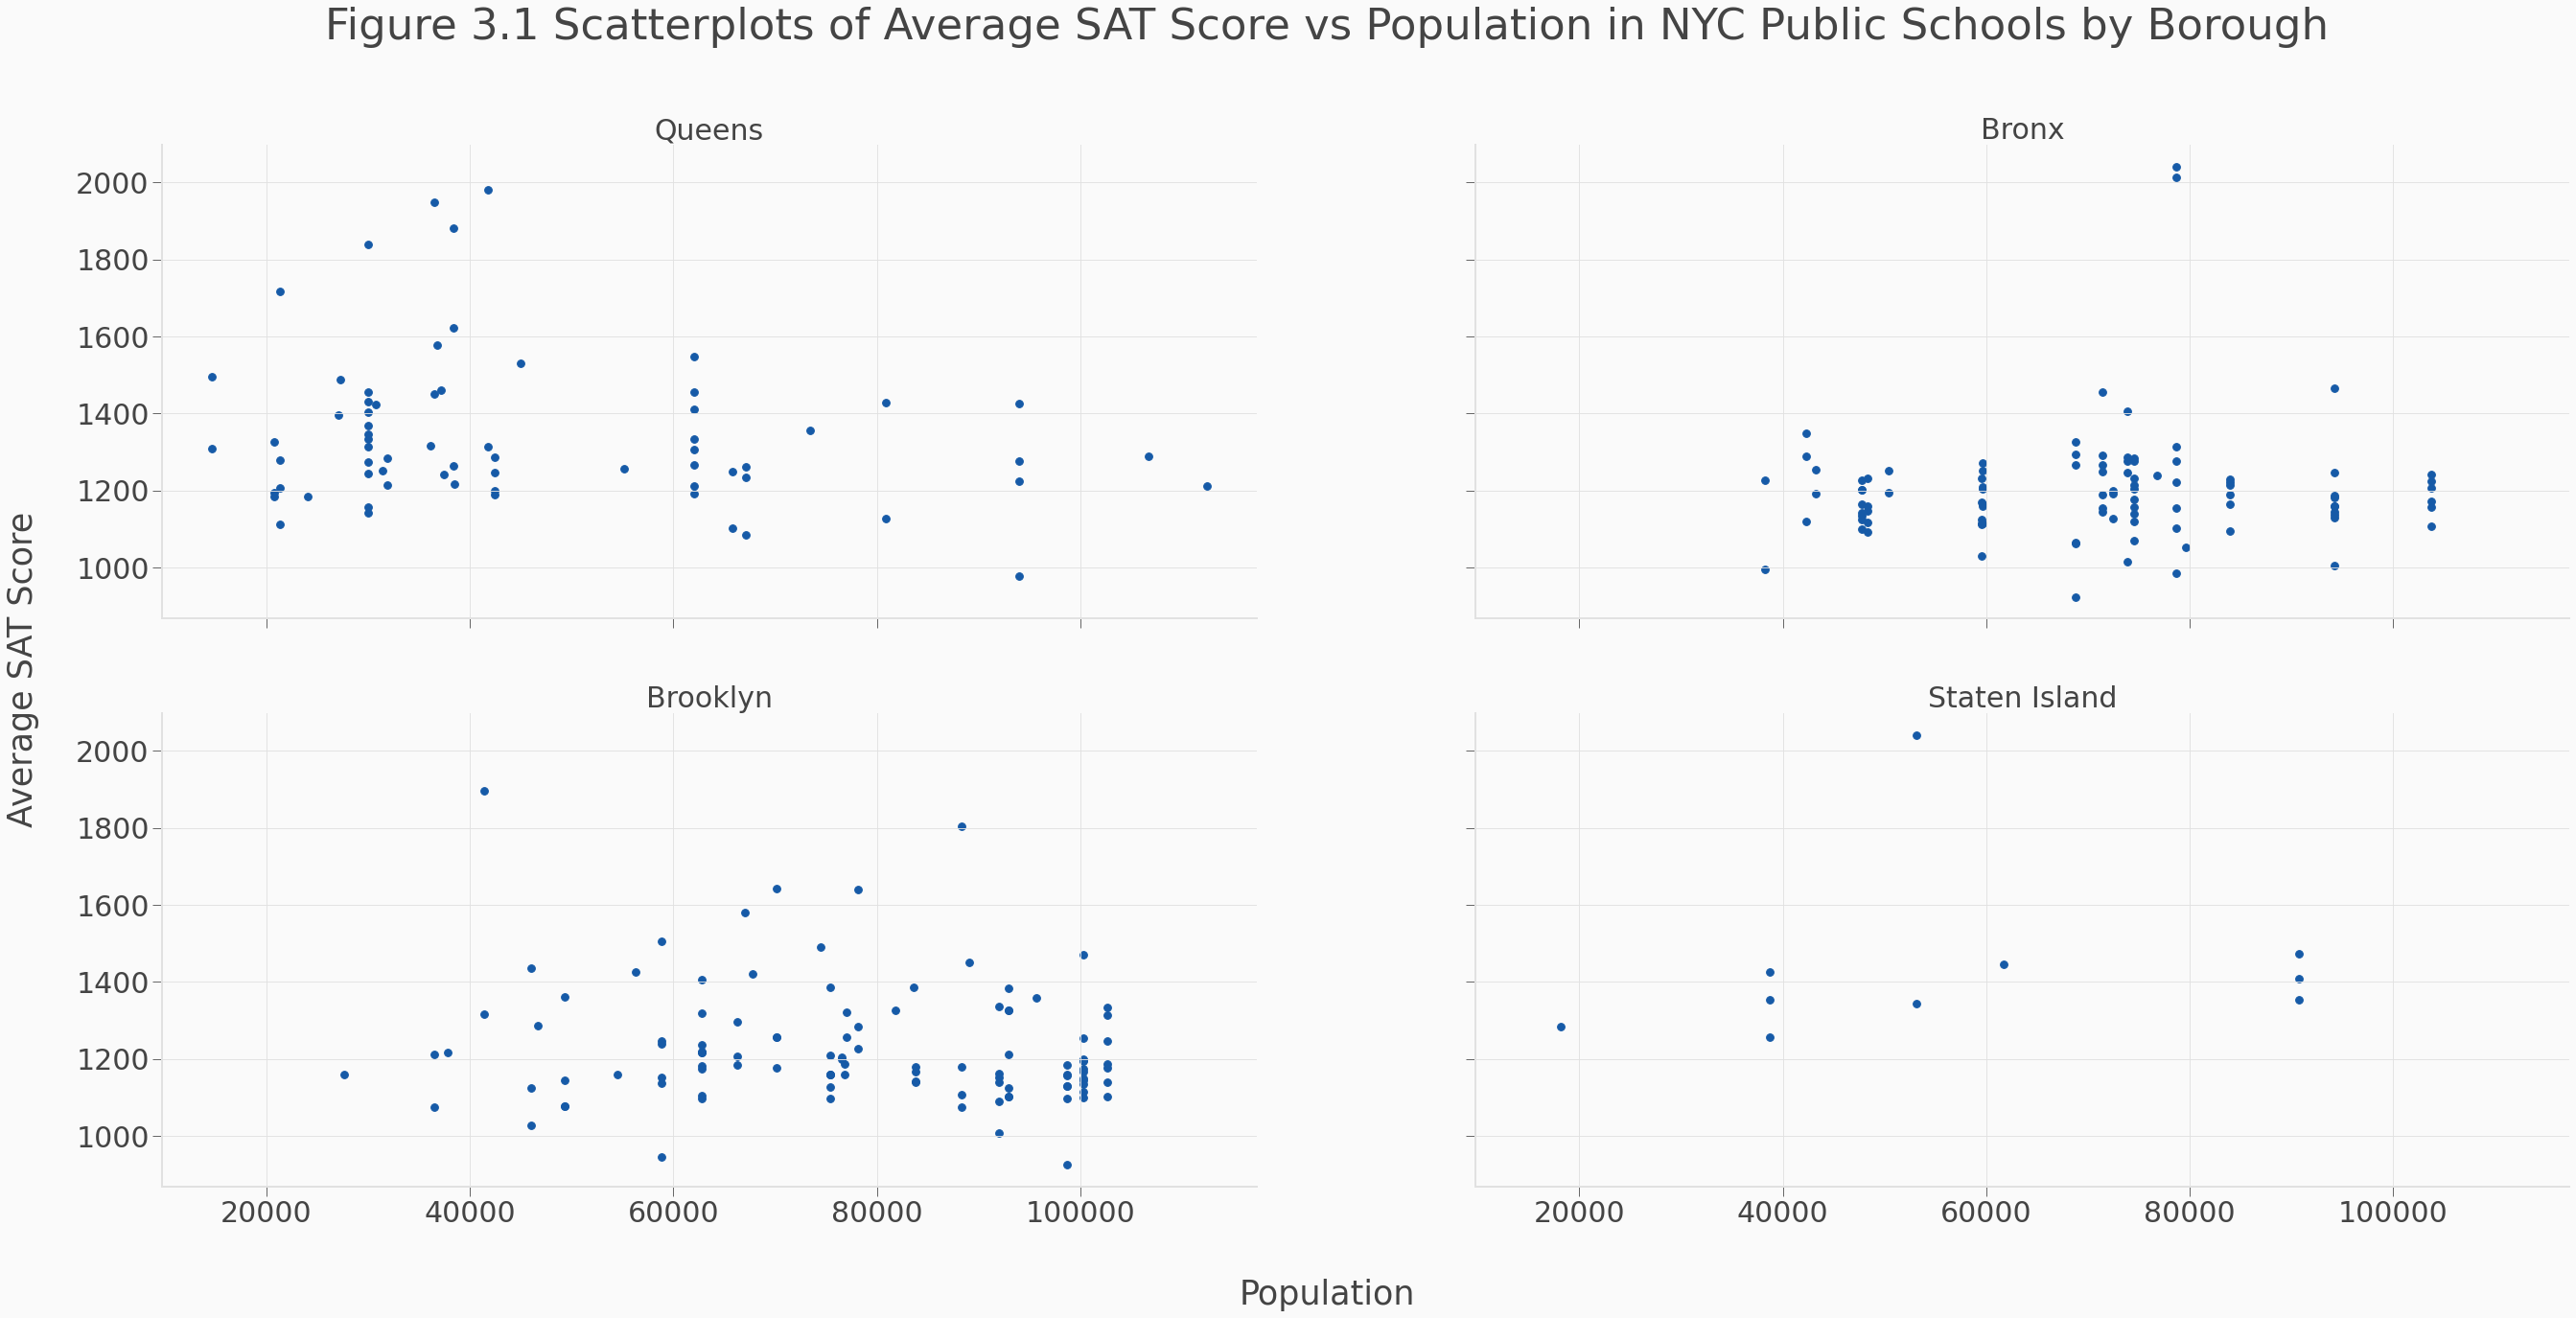

In [33]:
# scatterplots for scores by borough vs population (4 boroughs here)

def single_scatter_plot2(df, b, ax):
    """
    This function creates a single scatterplot of average SAT score against the population
    """
    # Filter data to keep only the data of interest
    _df = df.query("Borough == @b")[["Average SAT Score", "Population"]]
    _df.plot(kind = "scatter", x = "Population", y = "Average SAT Score", ax = ax, fontsize = 30, s = 60)

    return ax


fig, ax = plt.subplots(2, 2, figsize = (45, 20), sharey = True, sharex = True)
bgcolor = (250/255, 250/255, 250/255)
k = 0
for i in range(2):
    for j in range(2):
        single_scatter_plot2(popdf1, popdf1.Borough.unique()[k], ax[i, j]) 
        ax[i, j].set_ylabel("")
        ax[i, j].set_xlabel("")
        ax[i, j].spines['right'].set_visible(False)
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].set_facecolor(bgcolor) 
        ax[i, j].set_title(str(popdf1.Borough.unique()[k]), fontsize = 30)
        k += 1
    
fig.text(0.5, 0.04, 'Population', ha = 'center', fontsize = 35)
fig.text(0.075, 0.5, 'Average SAT Score', va = 'center', rotation = 'vertical', fontsize = 35)
fig.set_facecolor(bgcolor)
fig.suptitle("Figure 3.1 Scatterplots of Average SAT Score vs Population in NYC Public Schools by Borough", fontsize = 45)
plt.show()

From 4 scatterplots above, there is no clear relationship between population and average SAT scores of schools
in that borough. In Queens, Bronx,and Brooklyn boroughs, the regional average scores fluctuate within the same
range for different population under each zip code. Nothing can be drawn from the plot for Staten Island borough
since there is little information.

In the following, I will merge my original data of the Brooklyn borough with the scraped data of the population and do
a deeper analysis of the problem of interest. And as in the previous project, the analysis will focus on the Brooklyn
borough.

In [34]:
popdf2 = pd.merge(mdf, zip_pop, left_on = "Zip Code", right_on = "Zip Code", \
                 how = "inner").sort_values('Population', ascending = False).reset_index().drop(["ZCTA5CE10", "index"],\
                                                                                                axis = 1)
popdf2.head(5)

,geometry,Zip Code,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average SAT Score,Rank,Population
0,"MULTIPOLYGON (((-73.95560 40.72404, -73.95551 ...",11211,3.142857,33.071429,60.671429,1.914286,1214.571429,4.0,102624.0
1,"POLYGON ((-73.92161 40.64169, -73.91973 40.642...",11236,1.814286,84.071429,10.428571,1.671429,1187.571429,5.0,100331.0
2,"POLYGON ((-73.96755 40.64768, -73.96666 40.648...",11226,1.380000,84.840000,9.680000,2.840000,1199.400000,6.0,100277.0
3,"POLYGON ((-73.88909 40.68464, -73.88829 40.685...",11208,1.785714,42.600000,49.757143,4.371429,1112.428571,7.0,98660.0
4,"POLYGON ((-74.03847 40.63568, -74.03714 40.638...",11220,16.300000,7.700000,56.700000,18.000000,1360.000000,9.0,95643.0


### Visualization

First, I want to make a bar plot about the population of each area (by zip code). The vertical red line indicates the mean population of Brooklyn borough.

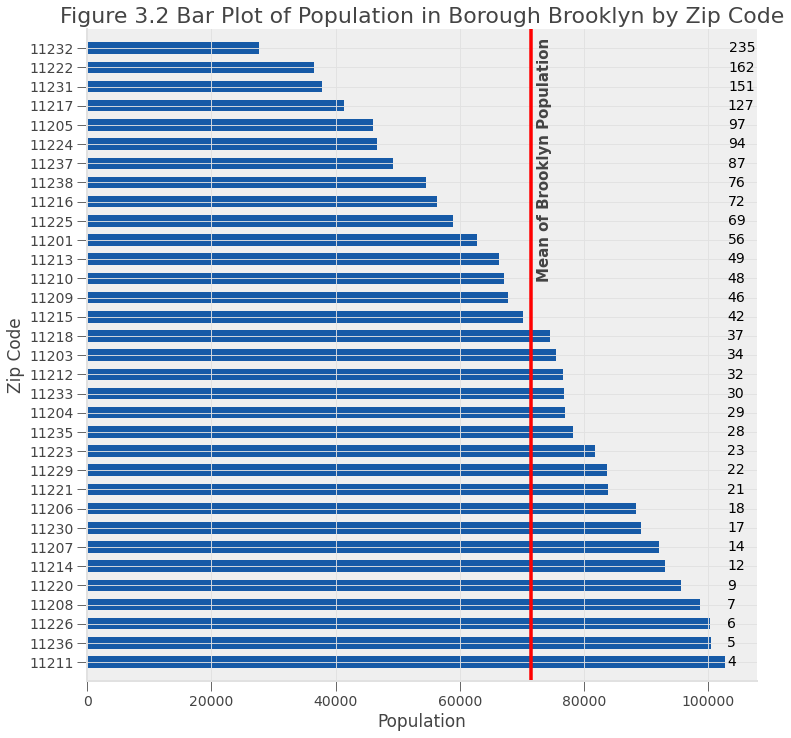

In [35]:
plt.figure(figsize = (12, 12))

plt.barh(popdf2["Zip Code"], popdf2["Population"], height = 0.6)
plt.title("Figure 3.2 Bar Plot of Population in Borough Brooklyn by Zip Code", fontsize = 22)
plt.xlabel("Population", fontsize = 17)
plt.ylabel("Zip Code", fontsize = 17)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.vlines(popdf2["Population"].mean(), -1.0, 33.0, color = "r", linewidth = 3.5)
plt.text(popdf2["Population"].mean() + 1000, 20, 'Mean of Brooklyn Population', fontsize = 15, fontweight = 'bold',\
         rotation = 90)
# add rank to the end of the bar
t = popdf2['Rank']
for i, v in enumerate(t):
    plt.text(v + 103000, i, int(v), color ='black', fontsize = 14, ha = 'left', va = 'center')

plt.margins(y = 0)   
plt.show()

From the bar plot above, see that
1. the range of the population in Brooklyn borough is large. Precisely, the smallest regional population is about a quarter of the biggest one;
2. there is a larger variance in population for areas with a population below the average than for those with population above the average;
3. there isn't a large difference in ranks between areas next to each other in the chart, except for the top 2 (zip code 11232 and 11222).

Second, I want to investigate whether there is a relationship between zip code-level SAT score, population and
distribution of ethnicity. Recall from last project, number of southern part schools recorded in the dataset is lower
(1 or 2) than that of other parts in the borough as well as region 11216, therefore, it is possible that different
patterns can be seen from the plot. And when that happens, patterns drawn from most regions above the middle
should be more accurate since small sample size increases the biasdness in the results.

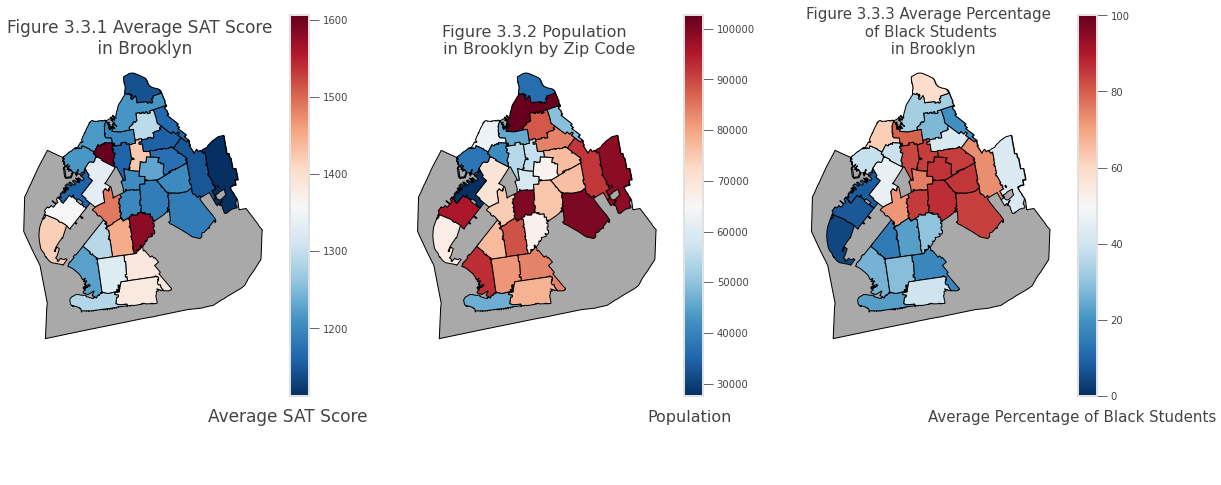

In [36]:
# Plot Average SAT Score, Population and Percent Black for each zip code in Kings County side-by-side

fig, gax = plt.subplots(figsize = (20, 10), ncols = 3) 

county_df.plot(ax = gax[0], edgecolor = "black", color = "darkgrey") 
mdf.plot(ax = gax[0], edgecolor = 'black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r',\
        legend_kwds = {'shrink': 0.7})
gax[0].annotate('Average SAT Score', xy = (0.17, 0.13),  xycoords = 'figure fraction', fontsize = 17)
gax[0].set_title('Figure 3.3.1 Average SAT Score \n in Brooklyn', fontsize = 17)
gax[0].axis('off')

county_df.plot(ax = gax[1], edgecolor = "black", color = "darkgrey") 
popdf2.plot(ax = gax[1], edgecolor = 'black', column = 'Population', legend = True, cmap = 'RdBu_r',\
        legend_kwds = {'shrink': 0.7})
gax[1].annotate('Population', xy = (0.53, 0.13),  xycoords = 'figure fraction', fontsize = 16)
gax[1].set_title('Figure 3.3.2 Population \n in Brooklyn by Zip Code', fontsize = 16)
gax[1].axis('off')

county_df.plot(ax = gax[2], edgecolor = "black", color = "darkgrey") 
mdf2.plot(ax = gax[2], edgecolor='black', column = 'Percent Black', legend = True, cmap = 'RdBu_r' ,\
        legend_kwds = {'shrink': 0.7}, vmin = 0, vmax = 100)
gax[2].annotate('Average Percentage of Black Students', xy = (0.76, 0.13),  xycoords = 'figure fraction', fontsize = 15)
gax[2].set_title('Figure 3.3.3 Average Percentage \n of Black Students \n in Brooklyn', fontsize = 15)
gax[2].axis('off')

plt.show()

From the map above, see that for the top and middle part of the borough, the average SAT score tend to be low if one of the population and Black percent is high, and vice versa. This pattern is the same for the southern parts, and the average SAT score is mainly affected by population since the percentage of Black students there is generally low.
Besides, in the most northeast part of the borough, the average SAT score is more inversely correlated with population than to the Percent Black whereas in the rest of the northeastern parts, Percent Black is more correlated with the average score.

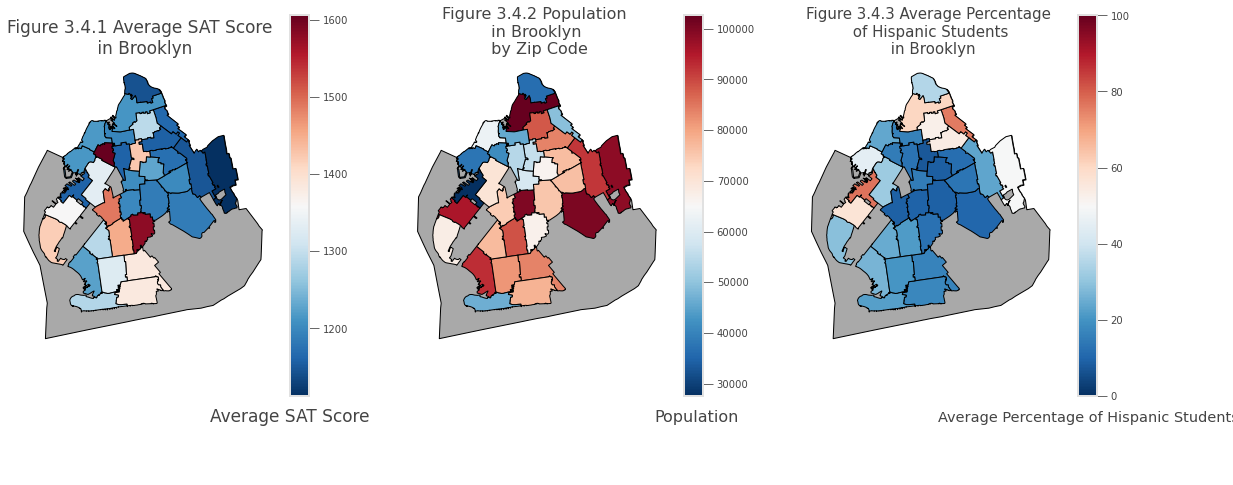

In [37]:
# Plot Average SAT Score, Population and Percent Hispanic for each zip code in Kings County side-by-side
popdf = pd.merge(mdf, zip_pop, left_on = "Zip Code", right_on = "Zip Code", \
                 how = "inner").drop(["Rank"], axis = 1).sort_values(['Population'])
fig, gax = plt.subplots(figsize = (20, 10), ncols = 3) 

county_df.plot(ax = gax[0], edgecolor = "black", color = "darkgrey") 
mdf.plot(ax = gax[0], edgecolor = 'black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r',\
        legend_kwds = {'shrink': 0.7})
gax[0].annotate('Average SAT Score', xy = (0.17, 0.13),  xycoords = 'figure fraction', fontsize = 17)
gax[0].set_title('Figure 3.4.1 Average SAT Score \n in Brooklyn', fontsize = 17)
gax[0].axis('off')

county_df.plot(ax = gax[1], edgecolor = "black", color = "darkgrey") 
popdf2.plot(ax = gax[1], edgecolor = 'black', column = 'Population', legend = True, cmap = 'RdBu_r',\
        legend_kwds = {'shrink': 0.7})
gax[1].annotate('Population', xy = (0.53, 0.13),  xycoords = 'figure fraction', fontsize = 16)
gax[1].set_title('Figure 3.4.2 Population \n in Brooklyn \n by Zip Code', fontsize = 16)
gax[1].axis('off')

county_df.plot(ax = gax[2], edgecolor = "black", color = "darkgrey") 
mdf4.plot(ax = gax[2], edgecolor = 'black', column = 'Percent Hispanic', legend = True, cmap = 'RdBu_r' ,\
        legend_kwds = {'shrink': 0.7}, vmin = 0, vmax = 100)
gax[2].annotate('Average Percentage of Hispanic Students', xy = (0.76, 0.13),  xycoords = 'figure fraction', fontsize = 14.5)
gax[2].set_title('Figure 3.4.3 Average Percentage \n of Hispanic Students \n in Brooklyn', fontsize = 15)
gax[2].axis('off')

plt.show()

From the map above, see that the average SAT score tend to be low if one of the population and Hispanice percent is high, and vice versa. And since the percentage of Hispanic students is generally low, the average SAT score is mainly affected by the regional population. Although there are exceptions (such as regions with zip codes 11209 and 11216), since they are in the sourthern part, I should still conclude that my finding is trustworthy according to the analysis at the beginning of the section.

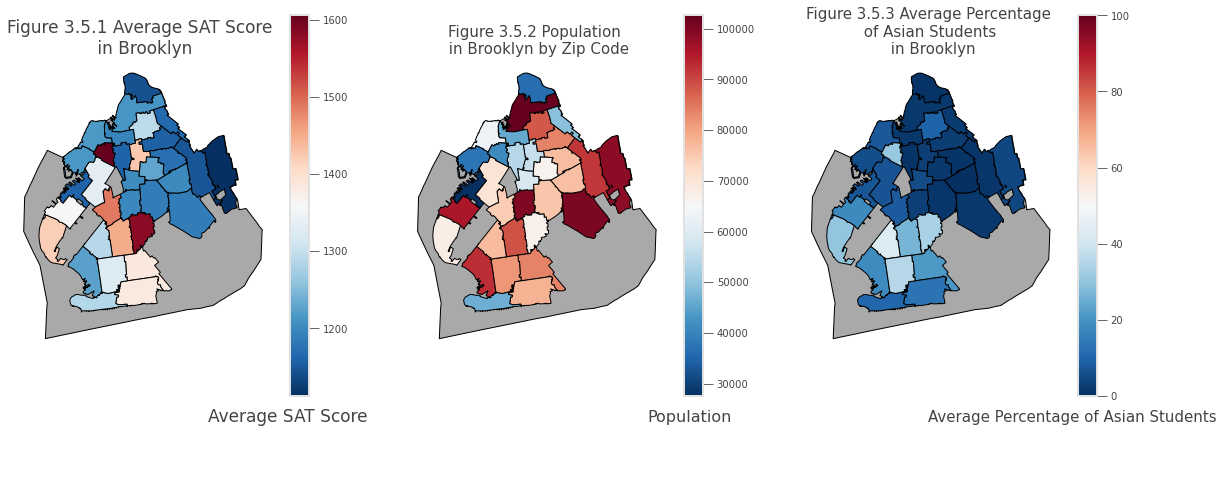

In [38]:
# Plot Average SAT Score, Population and Percent Asian for each zip code in Kings County side-by-side
popdf = pd.merge(mdf, zip_pop, left_on = "Zip Code", right_on = "Zip Code", \
                 how = "inner").drop(["Rank"], axis = 1).sort_values(['Population'])
fig, gax = plt.subplots(figsize = (20, 10), ncols = 3) 

county_df.plot(ax = gax[0], edgecolor = "black", color = "darkgrey") 
mdf.plot(ax = gax[0], edgecolor = 'black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r',\
        legend_kwds = {'shrink': 0.7})
gax[0].annotate('Average SAT Score', xy = (0.17, 0.13),  xycoords = 'figure fraction', fontsize = 17)
gax[0].set_title('Figure 3.5.1 Average SAT Score \n in Brooklyn', fontsize = 17)
gax[0].axis('off')

county_df.plot(ax = gax[1], edgecolor = "black", color = "darkgrey") 
popdf2.plot(ax = gax[1], edgecolor = 'black', column = 'Population', legend = True, cmap = 'RdBu_r',\
        legend_kwds = {'shrink': 0.7})
gax[1].annotate('Population', xy = (0.53, 0.13),  xycoords = 'figure fraction', fontsize = 16)
gax[1].set_title('Figure 3.5.2 Population \n in Brooklyn by Zip Code', fontsize = 15)
gax[1].axis('off')

county_df.plot(ax = gax[2], edgecolor = "black", color = "darkgrey") 
mdf5.plot(ax = gax[2], edgecolor='black', column = 'Percent Asian', legend = True, cmap = 'RdBu_r' ,\
        legend_kwds = {'shrink': 0.7}, vmin = 0, vmax = 100)
gax[2].annotate('Average Percentage of Asian Students', xy = (0.76, 0.13),  xycoords = 'figure fraction', fontsize = 15)
gax[2].set_title('Figure 3.5.3 Average Percentage \n of Asian Students \n in Brooklyn', fontsize = 15)
gax[2].axis('off')

plt.show()

For Asian Percent, the average SAT score tend to be relatively low if either the population or Asian percent is relatively high, and vice versa. Also, since the percentage of Asian students is generally low, the average SAT score is mainly affected by the regional population. Some exceptions in regions with small number of schools contained in the dataset is ignored.

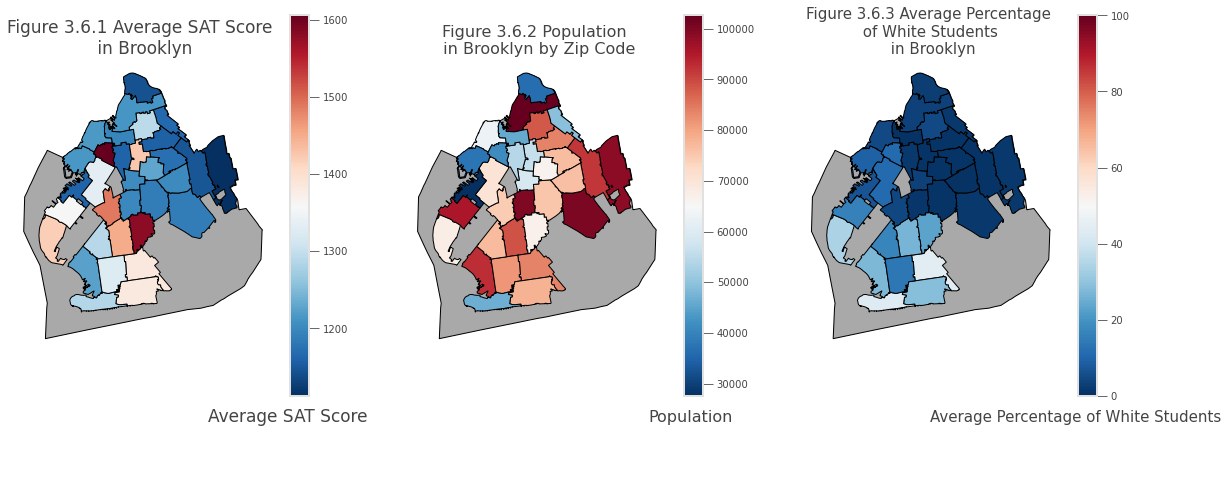

In [39]:
# Plot Average SAT Score, Population and Percent White for each zip code in Kings County side-by-side
popdf = pd.merge(mdf, zip_pop, left_on = "Zip Code", right_on = "Zip Code", \
                 how = "inner").drop(["Rank"], axis = 1).sort_values(['Population'])
fig, gax = plt.subplots(figsize = (20, 10), ncols = 3) 

county_df.plot(ax = gax[0], edgecolor = "black", color = "darkgrey") 
mdf.plot(ax = gax[0], edgecolor = 'black', column = 'Average SAT Score', legend = True, cmap = 'RdBu_r',\
        legend_kwds = {'shrink': 0.7})
gax[0].annotate('Average SAT Score', xy = (0.17, 0.13),  xycoords = 'figure fraction', fontsize = 17)
gax[0].set_title('Figure 3.6.1 Average SAT Score \n in Brooklyn', fontsize = 17)
gax[0].axis('off')

county_df.plot(ax = gax[1], edgecolor = "black", color = "darkgrey") 
popdf2.plot(ax = gax[1], edgecolor = 'black', column = 'Population', legend = True, cmap = 'RdBu_r',\
        legend_kwds = {'shrink': 0.7})
gax[1].annotate('Population', xy = (0.53, 0.13),  xycoords = 'figure fraction', fontsize = 16)
gax[1].set_title('Figure 3.6.2 Population \n in Brooklyn by Zip Code', fontsize = 16)
gax[1].axis('off')

county_df.plot(ax = gax[2], edgecolor = "black", color = "darkgrey") 
mdf3.plot(ax = gax[2], edgecolor='black', column = 'Percent White', legend = True, cmap = 'RdBu_r' ,\
        legend_kwds = {'shrink': 0.7}, vmin = 0, vmax = 100)
gax[2].annotate('Average Percentage of White Students', xy = (0.76, 0.13),  xycoords = 'figure fraction', fontsize = 15)
gax[2].set_title('Figure 3.6.3 Average Percentage \n of White Students \n in Brooklyn', fontsize = 15)
gax[2].axis('off')

plt.show()

Similarly, the average SAT score tend to be relatively low if either the population or Asian percent is relatively high, and vice versa. Also, the average SAT score is mainly affected by the regional population sice the percentage of Asian students is generally low (just like Hispanic Percent and Asian Percent). Some exceptions in regions with small number of schools contained in the dataset is ignored.

## Conclusion

Summarizing findings in project 1, 2, and 3, I found that for the Borough Brooklyn,
1. `Black Percent` and `Hispanic Percent` are generally high than  `Asian Percent` and `White Percent`, especially in areas above the middle of the Borough. Thus, the average SAT score there is affected by the percentage of black and Hispanic students together.
2. As `Asian Percent` and `White Percent` are relatively low in all parts of the borough, their impact on regional average SAT score is small.
3. For the northeast and middle region of the borough, the average SAT score is affected by population and the percentage of black and Hispanic students. The average score is low when any of the three is high.
4. For the rest part of the borough, the score tends to be inversely correlated with the population. But since not many schools in that region were included in the dataset, this result may not be accurate. 
The analysis for the other boroughs will use the same measure and similar way of interpretation.